In [1]:
from pathlib import Path
from configparser import ConfigParser

import pandas as pd
import warnings

from current_research_feature_effects.plotting.table_formatting import format_dataframe, highlight_min_feature_metric
from current_research_feature_effects.plotting.plots import plot_feature_effect_error_table

warnings.simplefilter("ignore", pd.errors.PerformanceWarning)

In [2]:
EXPERIMENT_PATH = Path("../experiments/main_study")
config = ConfigParser()
config.read(EXPERIMENT_PATH / "main_study.ini")
effects_results_storage = config.get("storage", "effects_results")

## SimpleNormalCorrelated

### PDP

In [3]:
df_snc_pdp = pd.read_sql_table("pdp_results", f"sqlite:///{EXPERIMENT_PATH}/SimpleNormalCorrelated/{effects_results_storage}")
display(format_dataframe(df_snc_pdp).style.apply(highlight_min_feature_metric, axis=None).format("{:.6f}"))

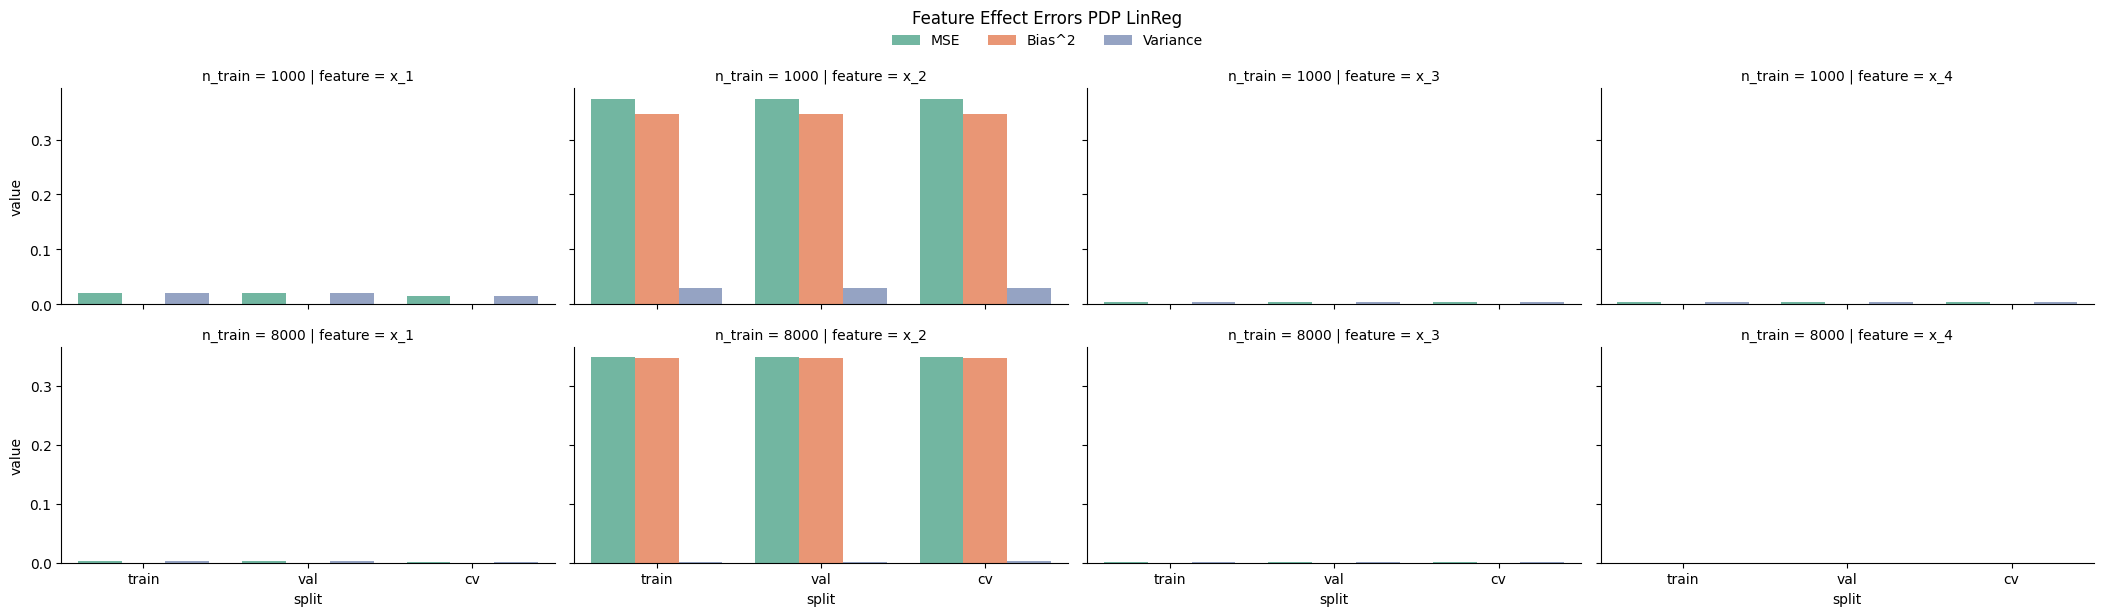

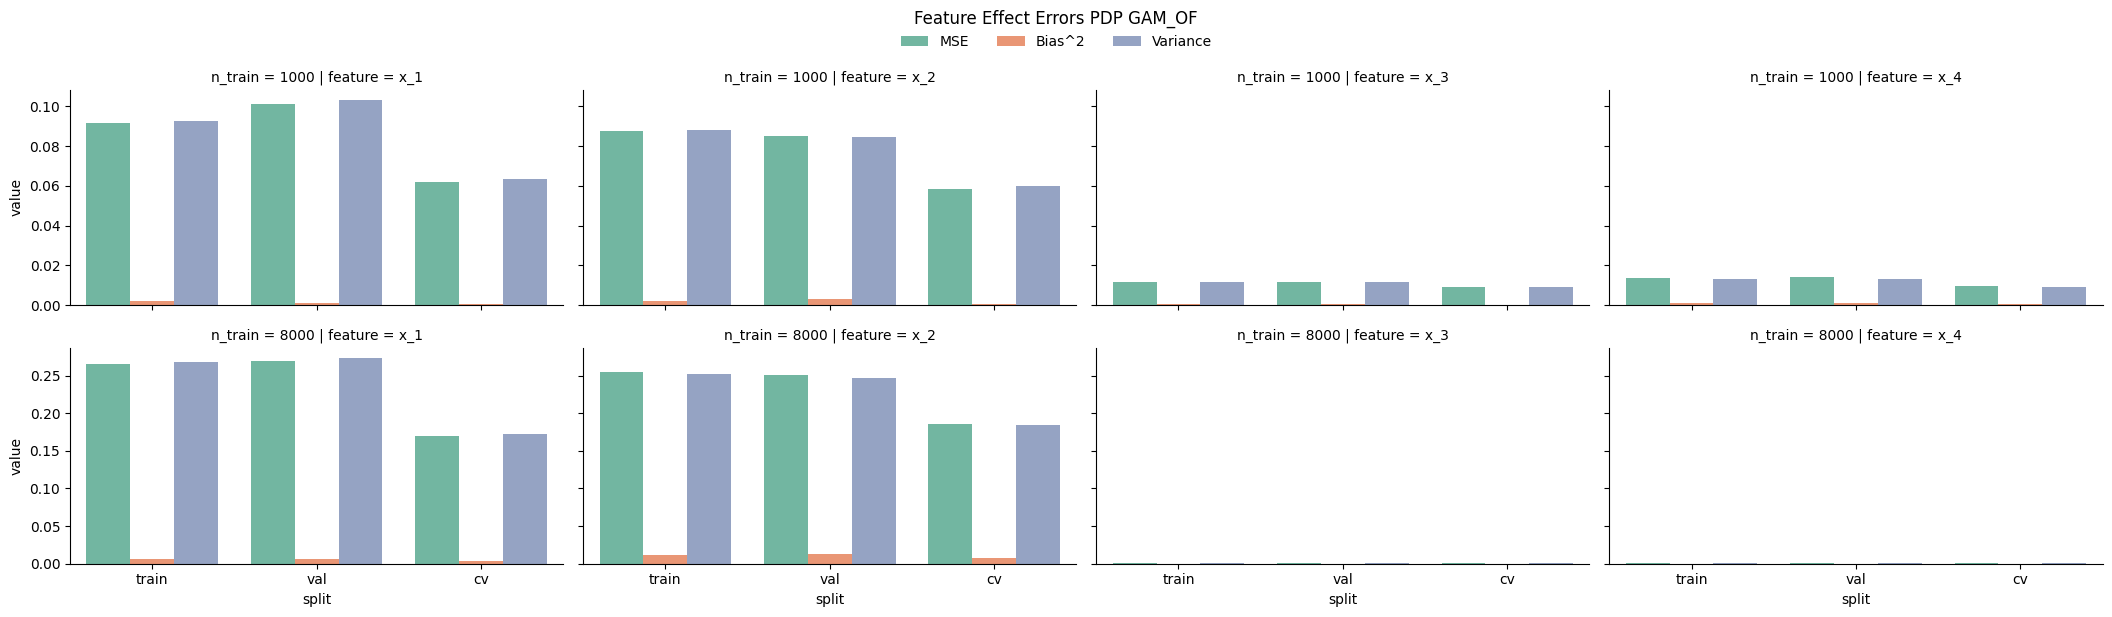

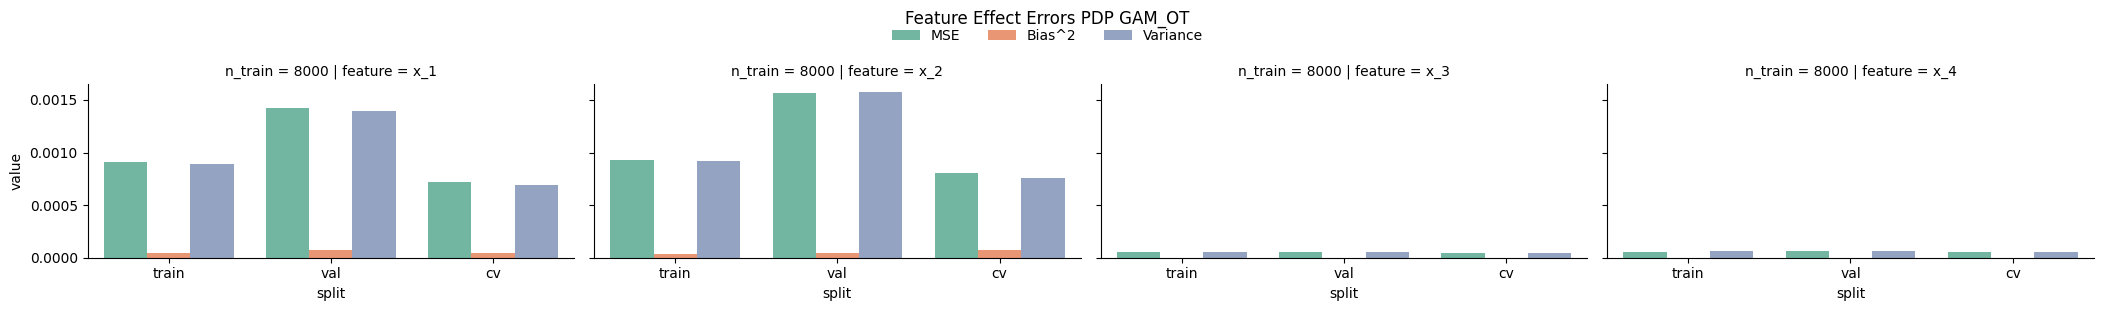

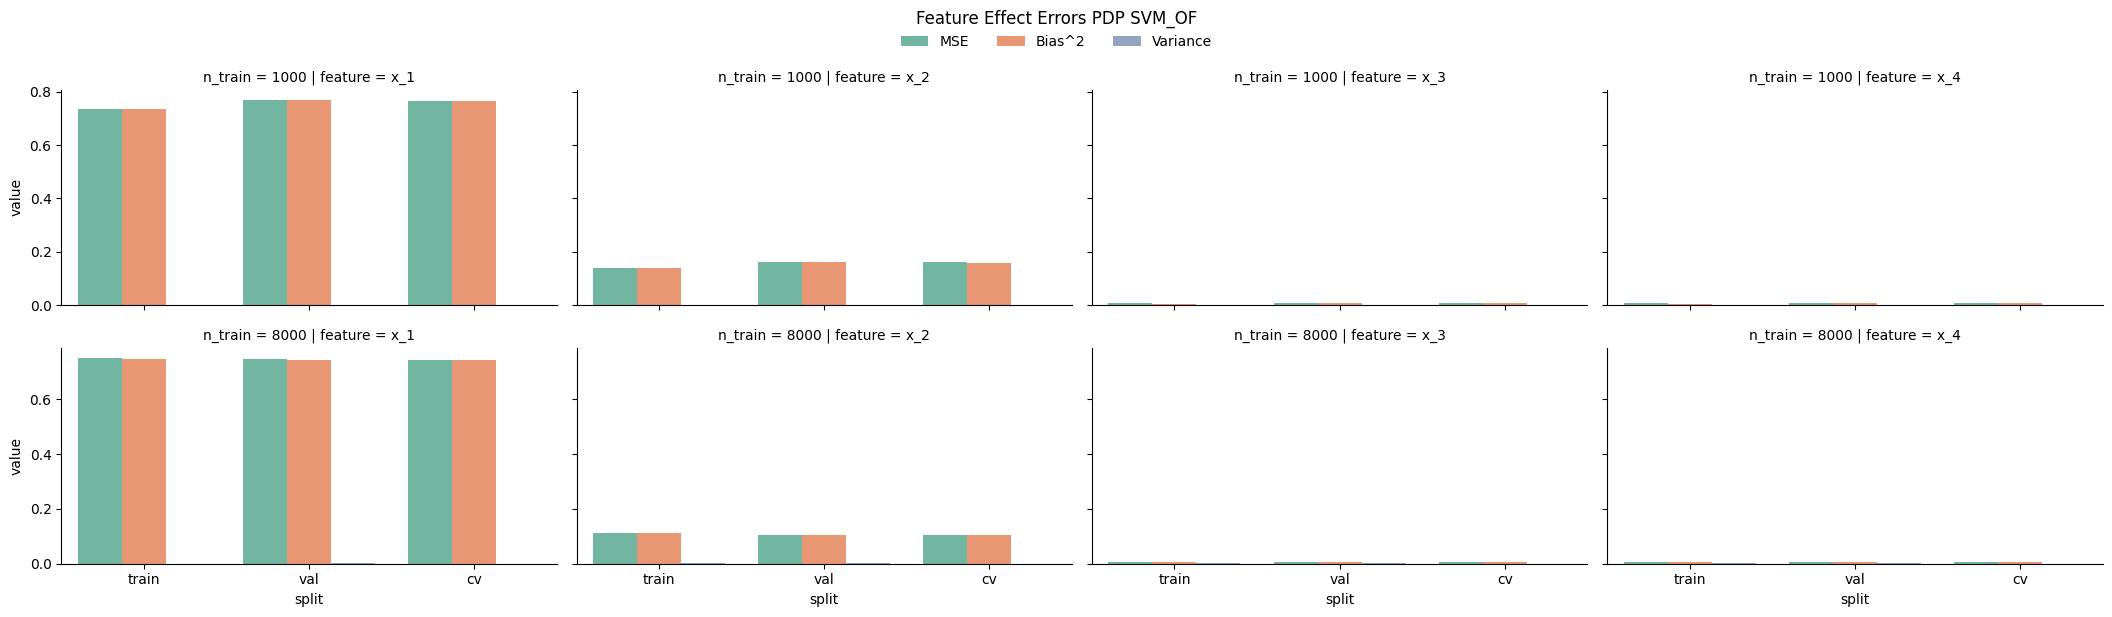

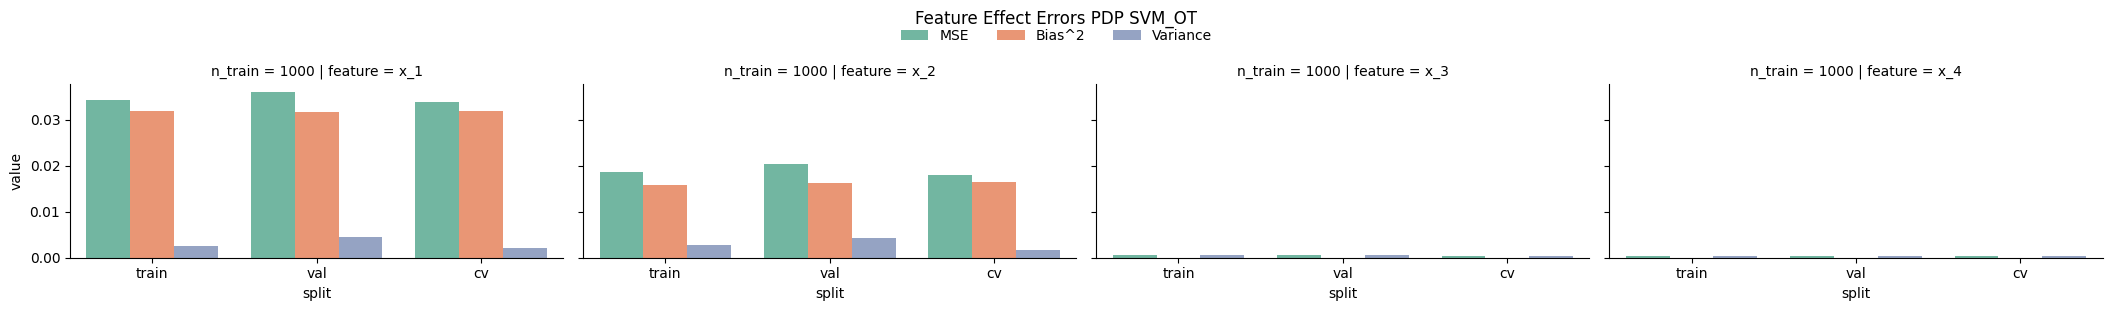

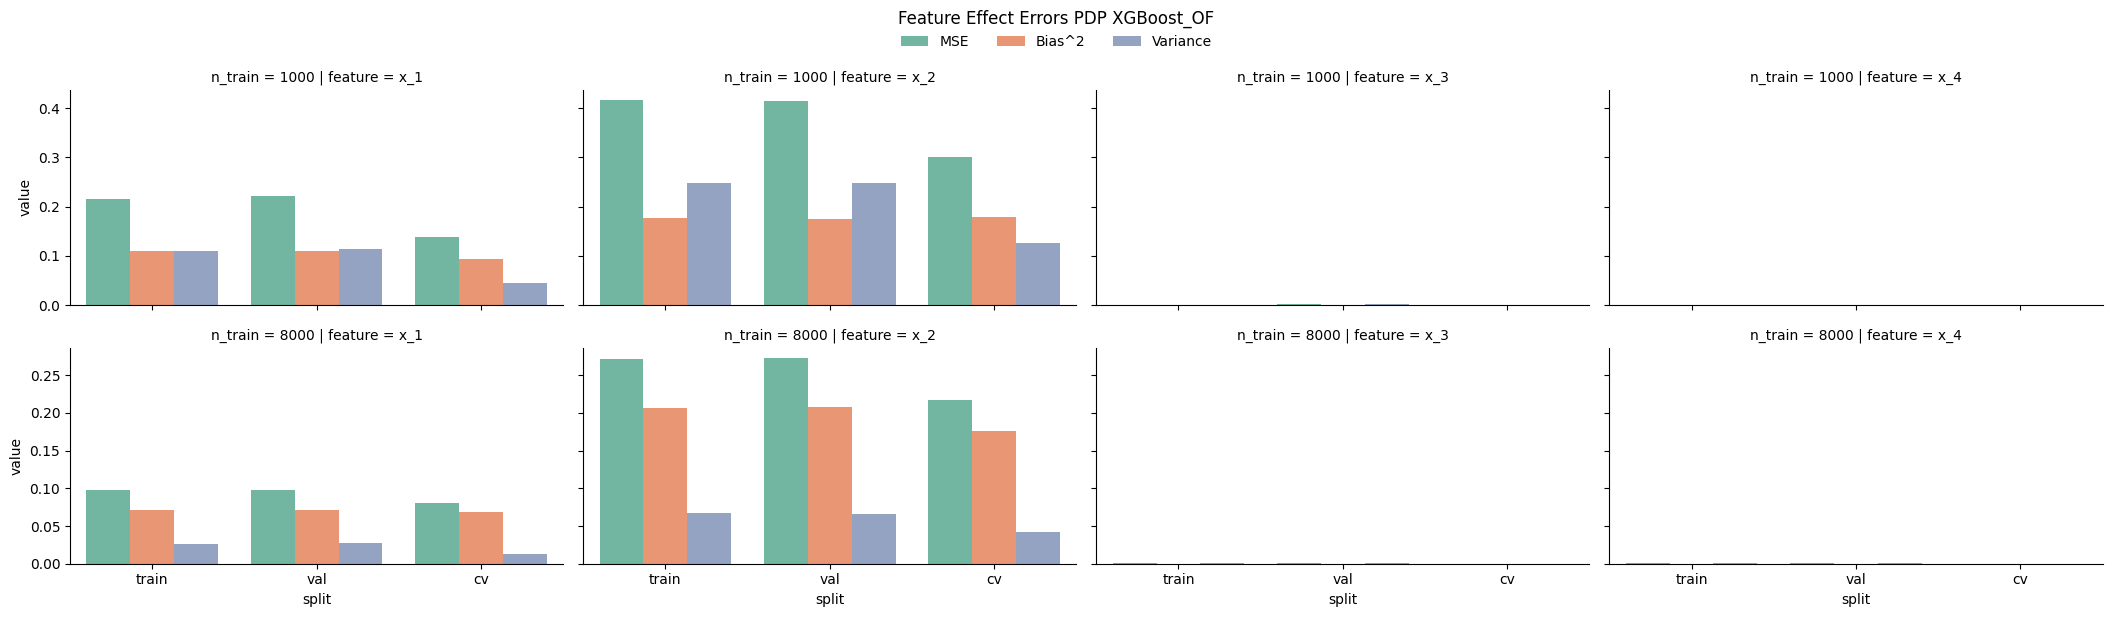

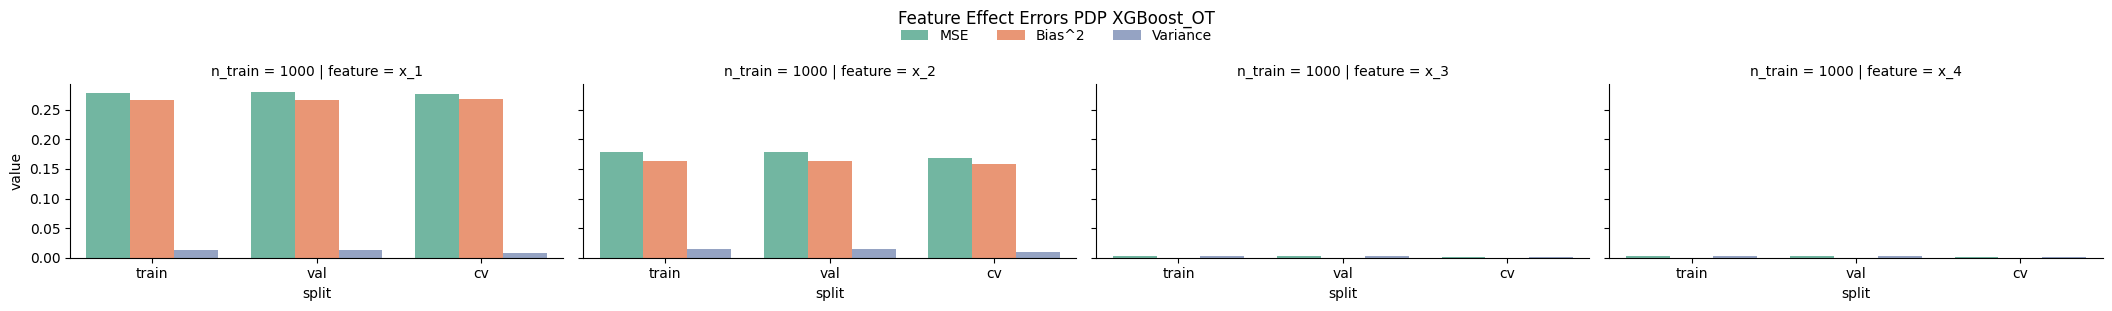

In [4]:
plot_feature_effect_error_table(df_snc_pdp, models=['LinReg', 'GAM_OF', 'GAM_OT', 'SVM_OF', 'SVM_OT', 'XGBoost_OF', 'XGBoost_OT'], type='pdp')

Observations:
- mostly similar errors, although cv slightly favorable (followed by train)
- cv reduces variance compared to other two especially for overfitting models
- exception: overfitted SVM - very high bias but low variance throughout although overfitted - why?

### ALE

In [5]:
df_snc_ale = pd.read_sql_table("ale_results", f"sqlite:///{EXPERIMENT_PATH}/SimpleNormalCorrelated/{effects_results_storage}")
display(format_dataframe(df_snc_ale).style.apply(highlight_min_feature_metric, axis=None).format("{:.6f}"))

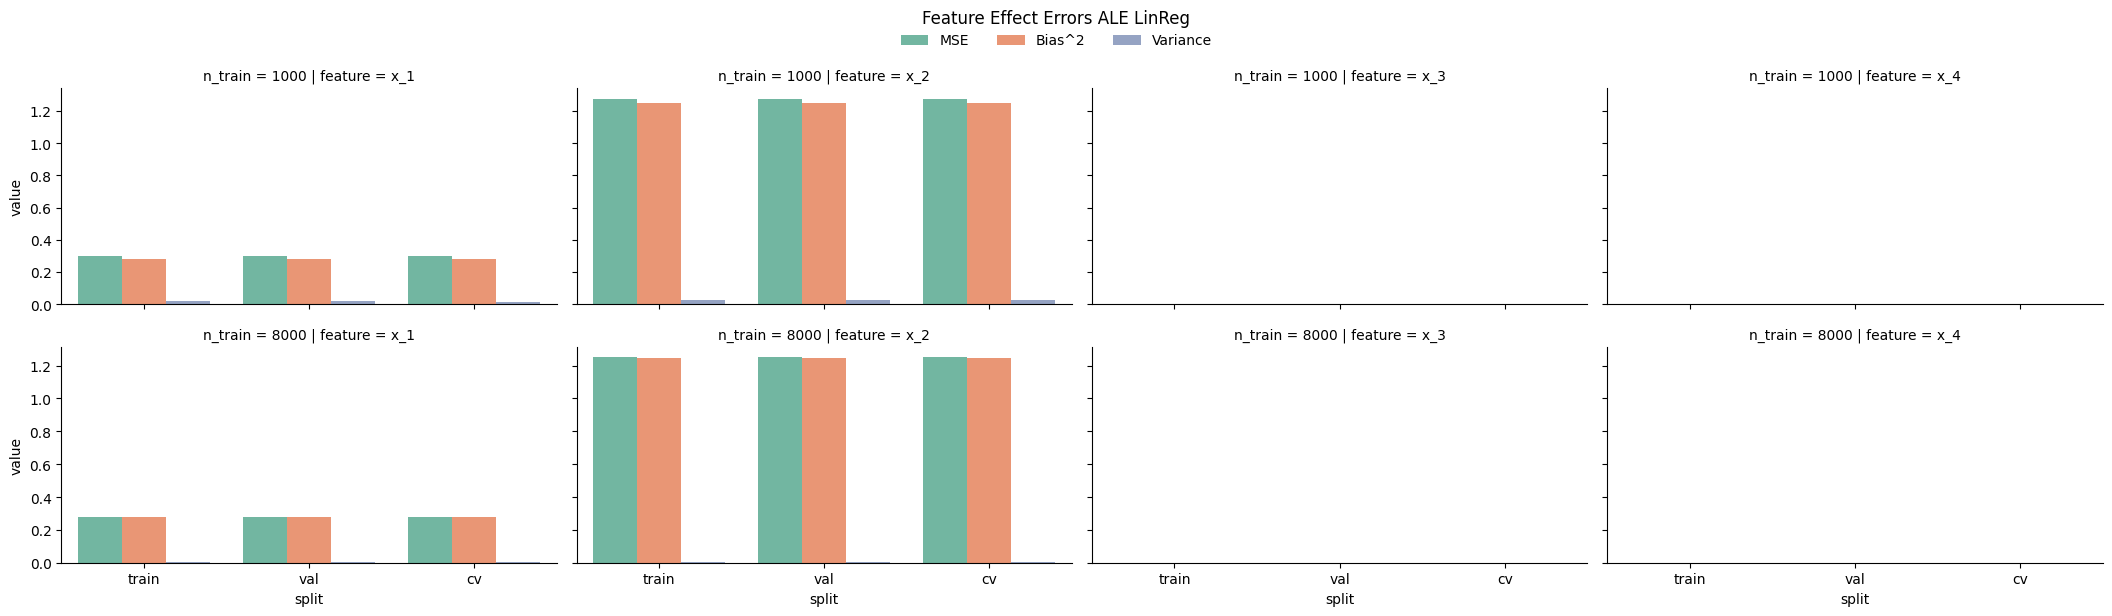

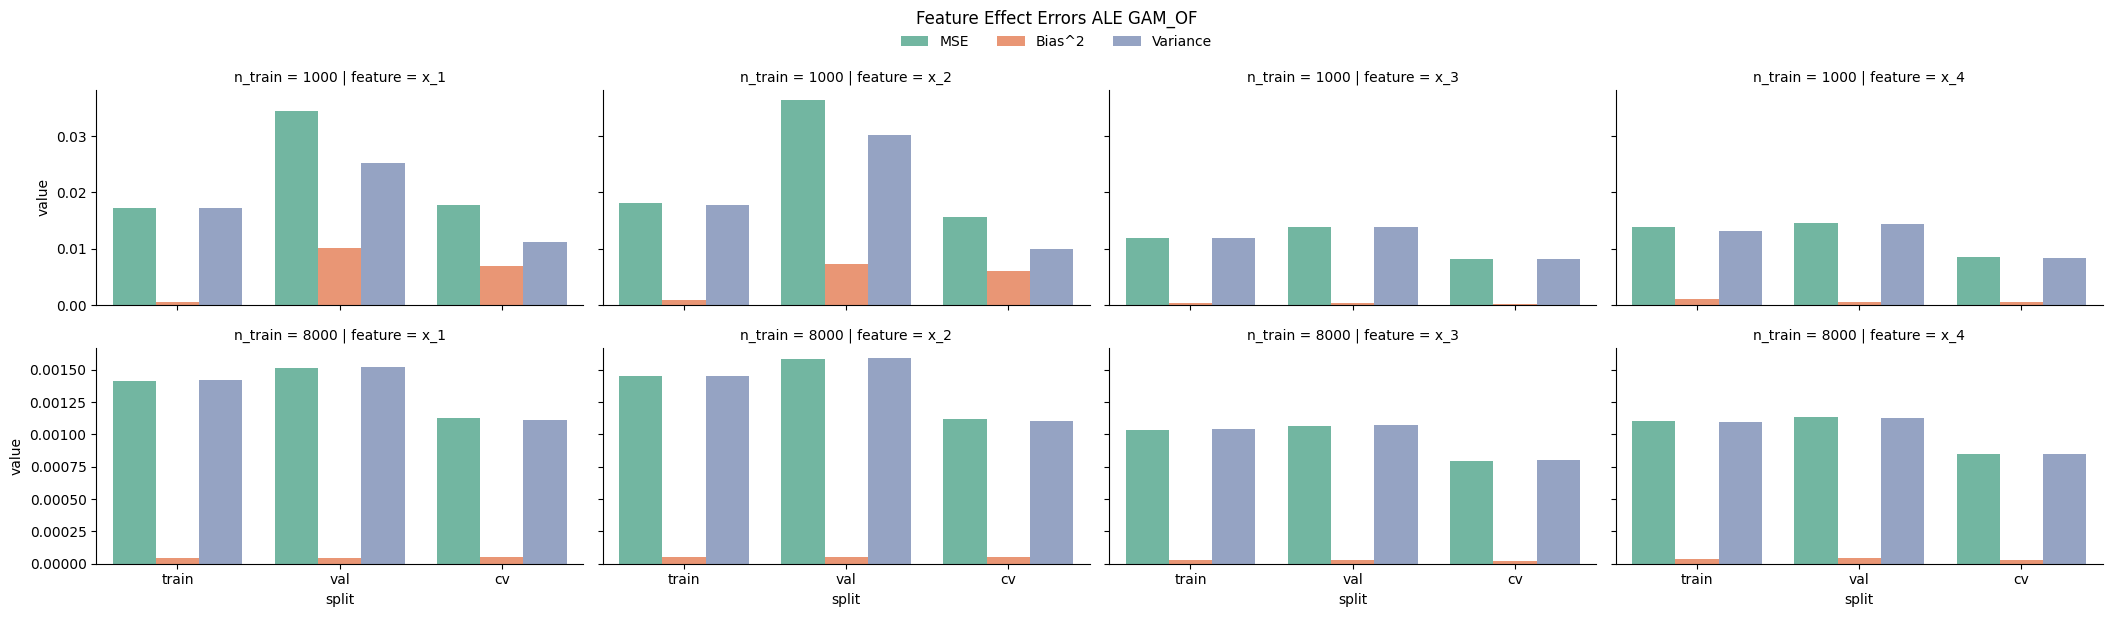

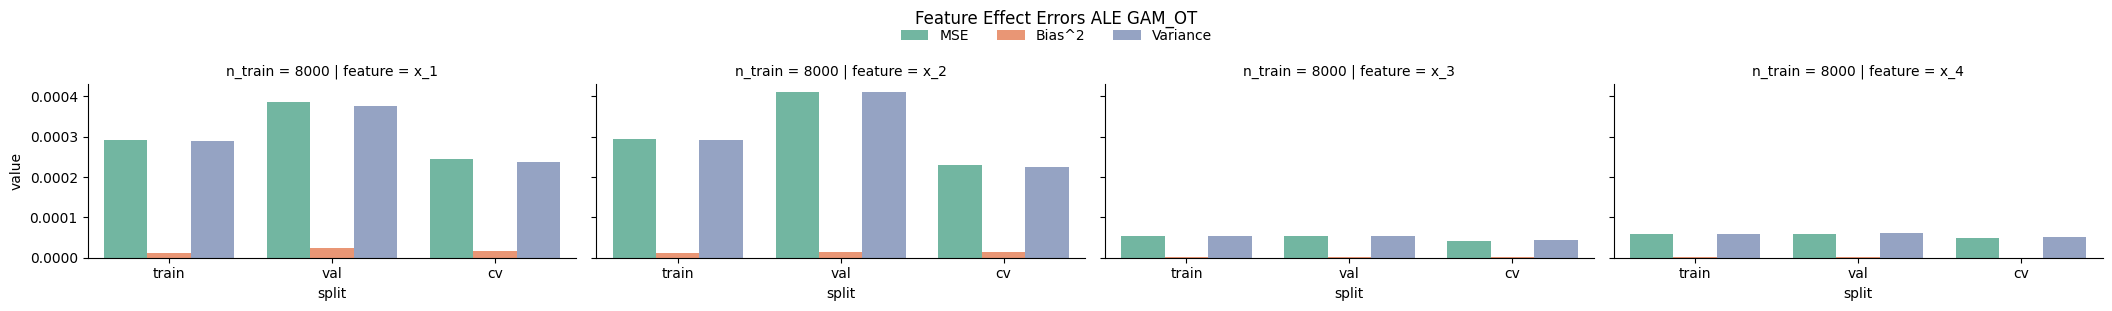

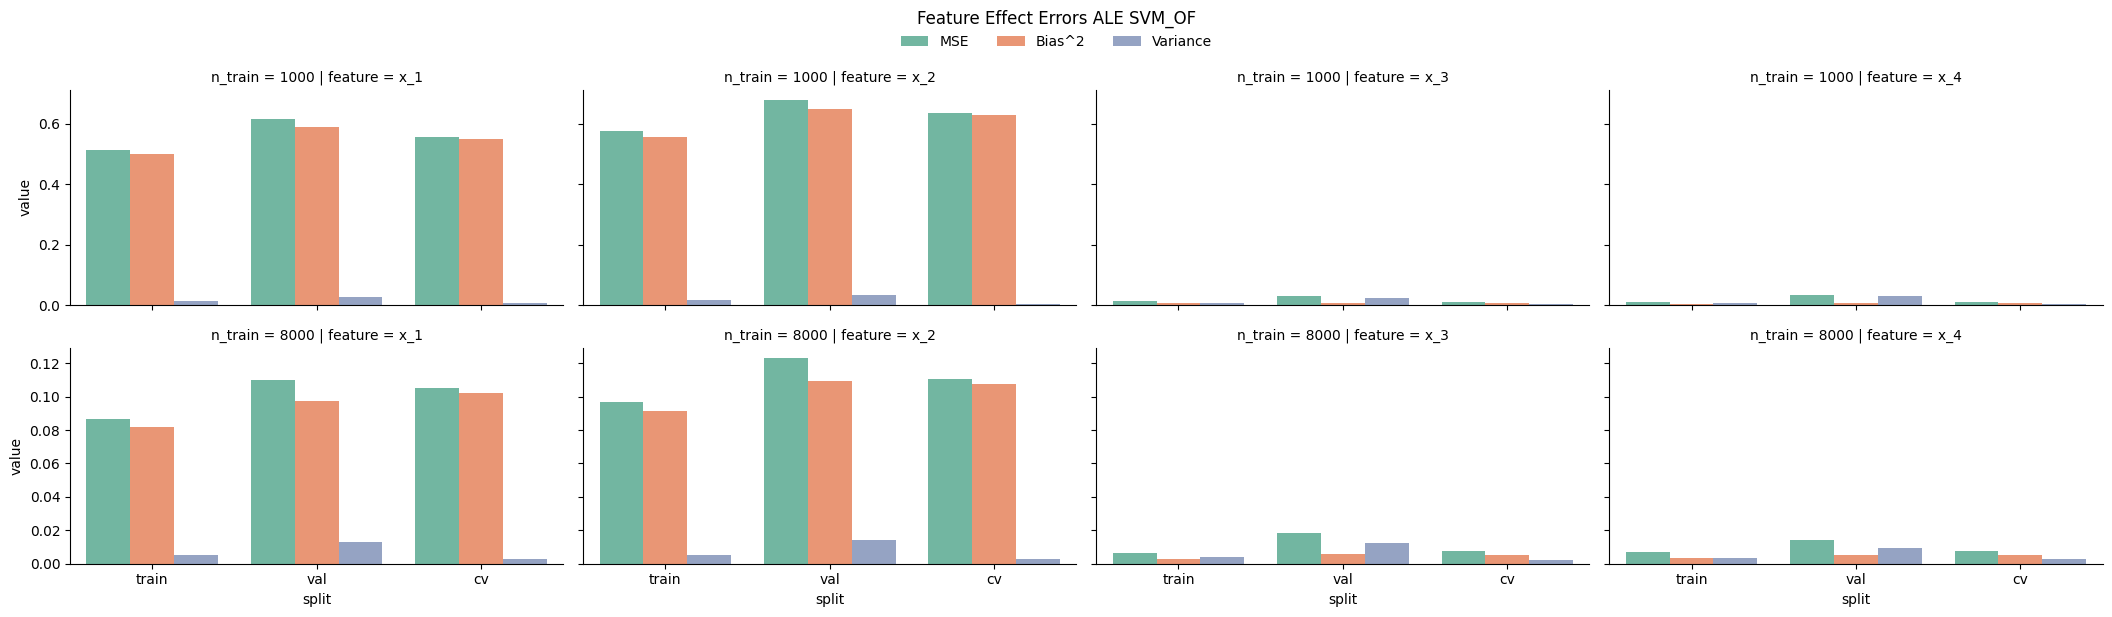

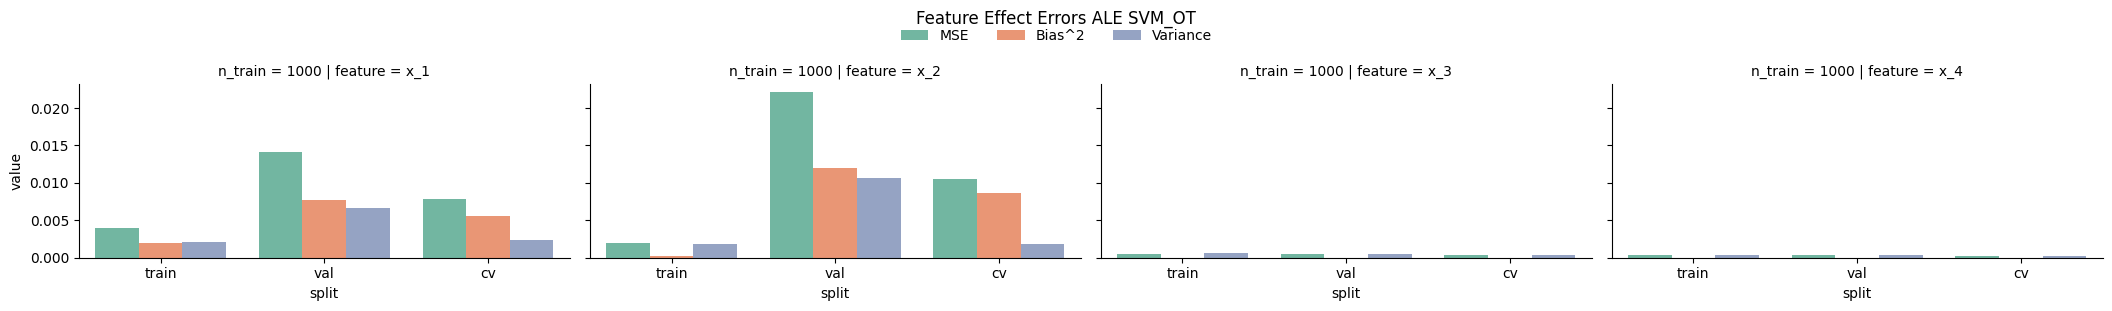

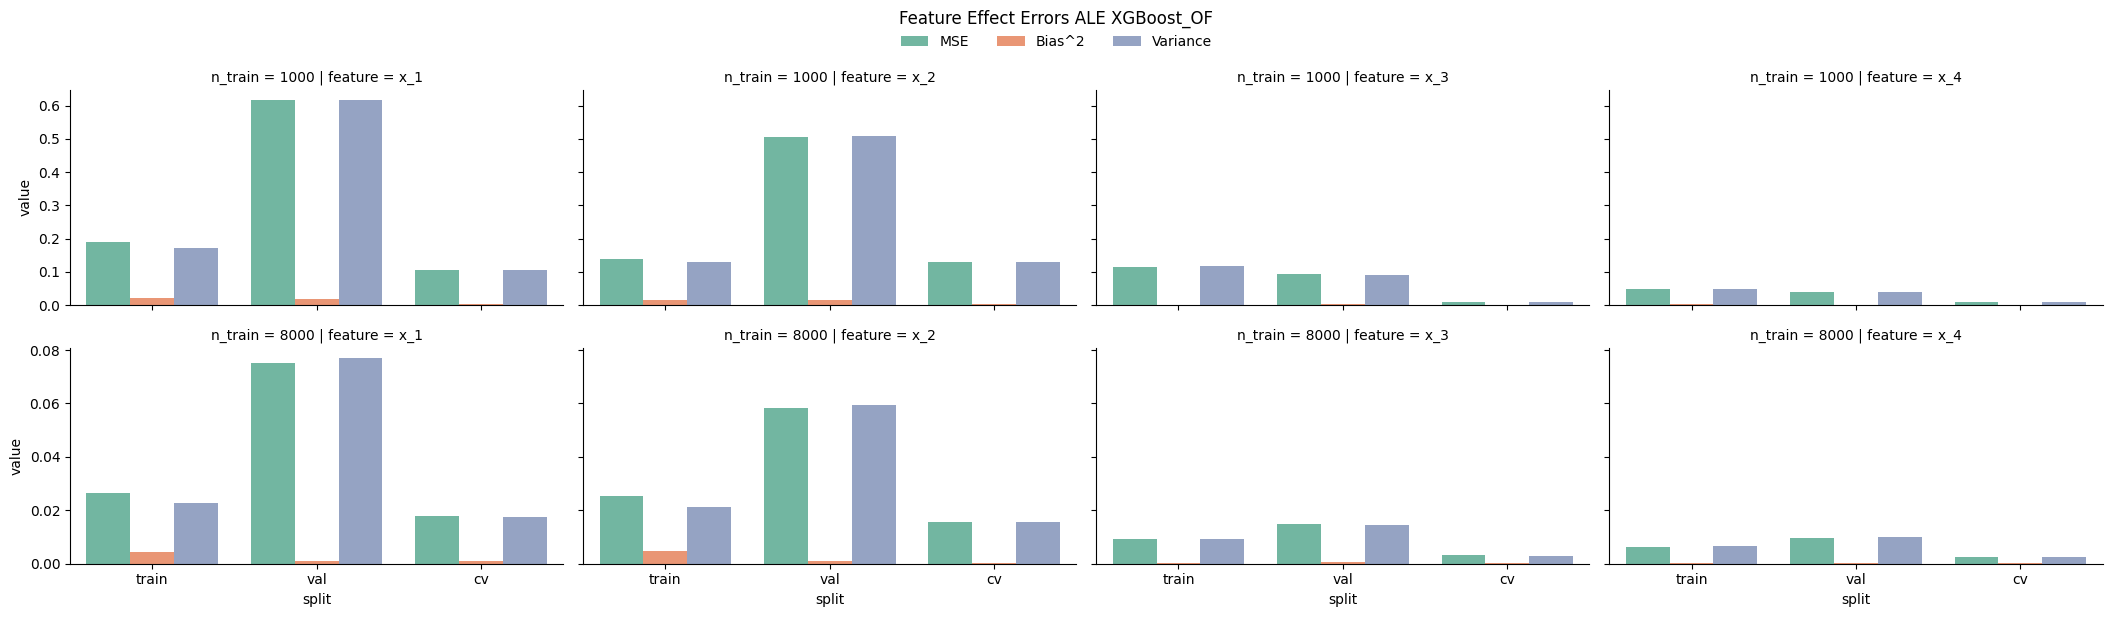

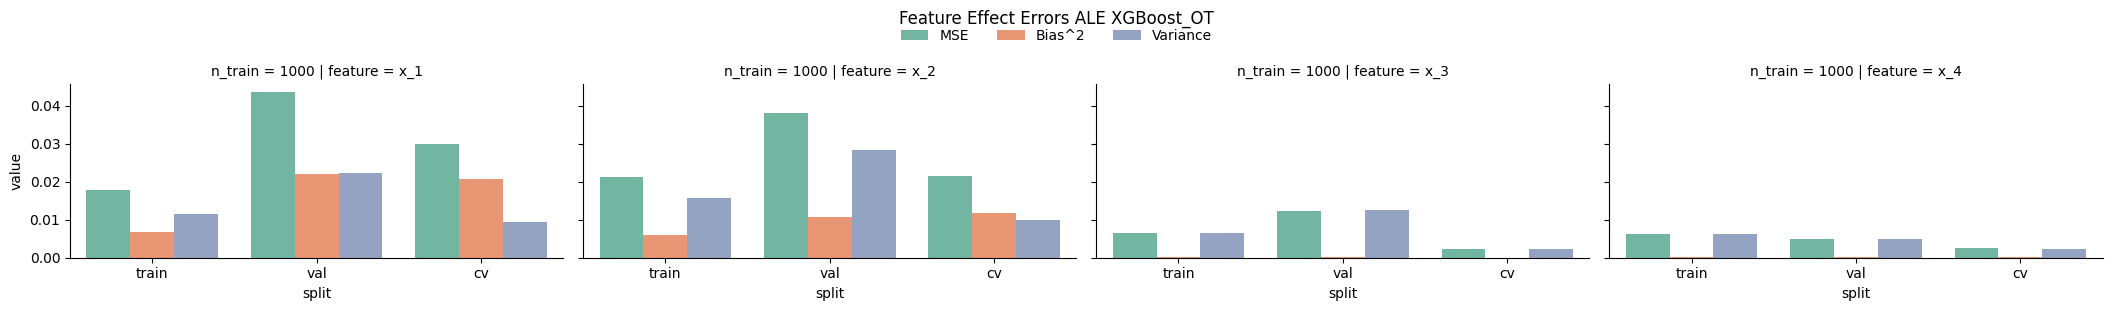

In [7]:
plot_feature_effect_error_table(df_snc_ale, models=['LinReg', 'GAM_OF', 'GAM_OT', 'SVM_OF', 'SVM_OT', 'XGBoost_OF', 'XGBoost_OT'], type='ale')

Observations:
- similar observations as for ALE (although train split more often favorable)
- val split results consistently worse -> suggests higher importance of sample size for ALE

## Friedman1

### PDP

In [9]:
df_fr1_pdp = pd.read_sql_table("pdp_results", f"sqlite:///{EXPERIMENT_PATH}/Friedman1{effects_results_storage}")

In [10]:
format_dataframe(df_fr1_pdp).style.apply(highlight_min_feature_metric, axis=None).format("{:.6f}")

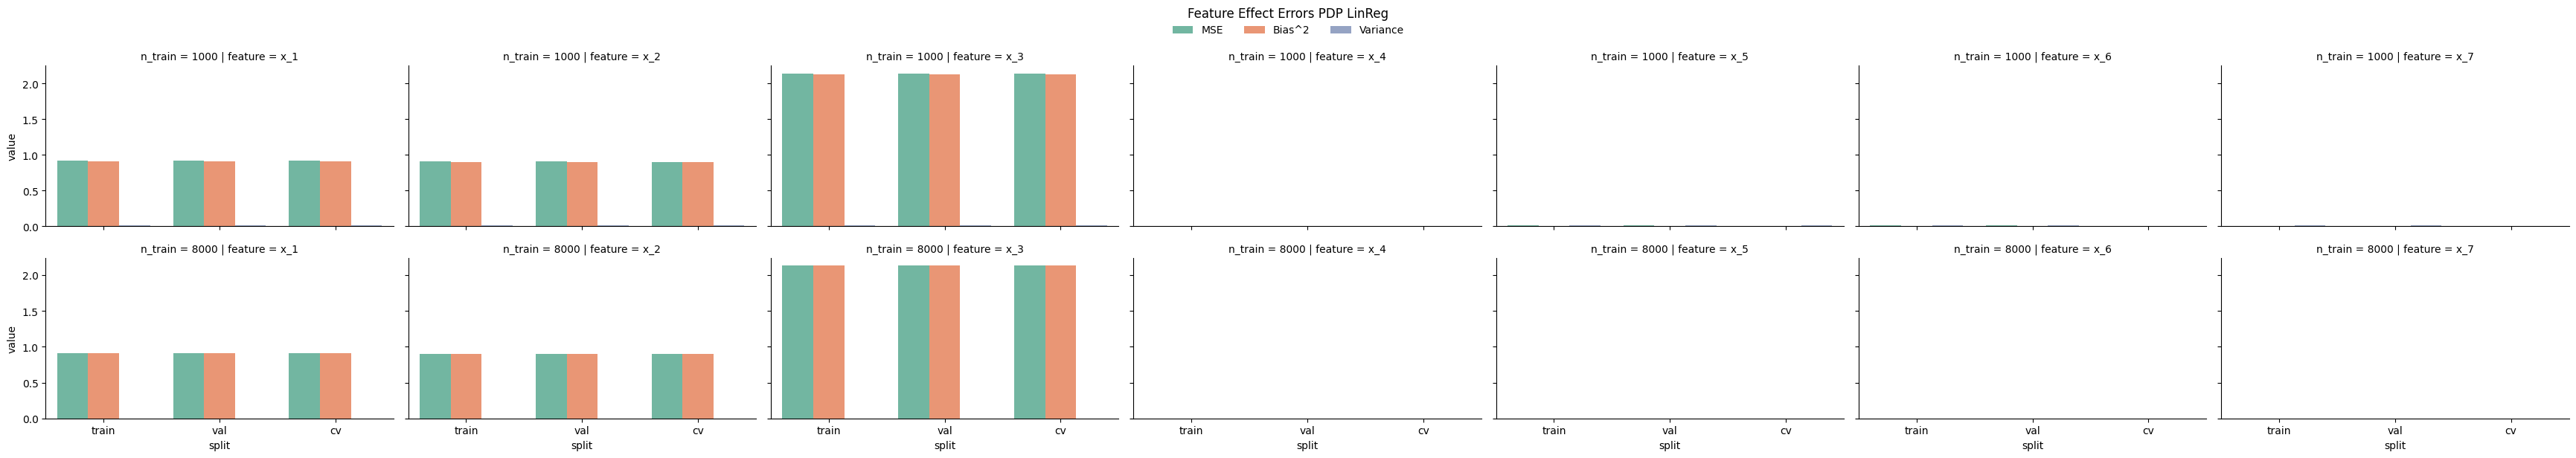

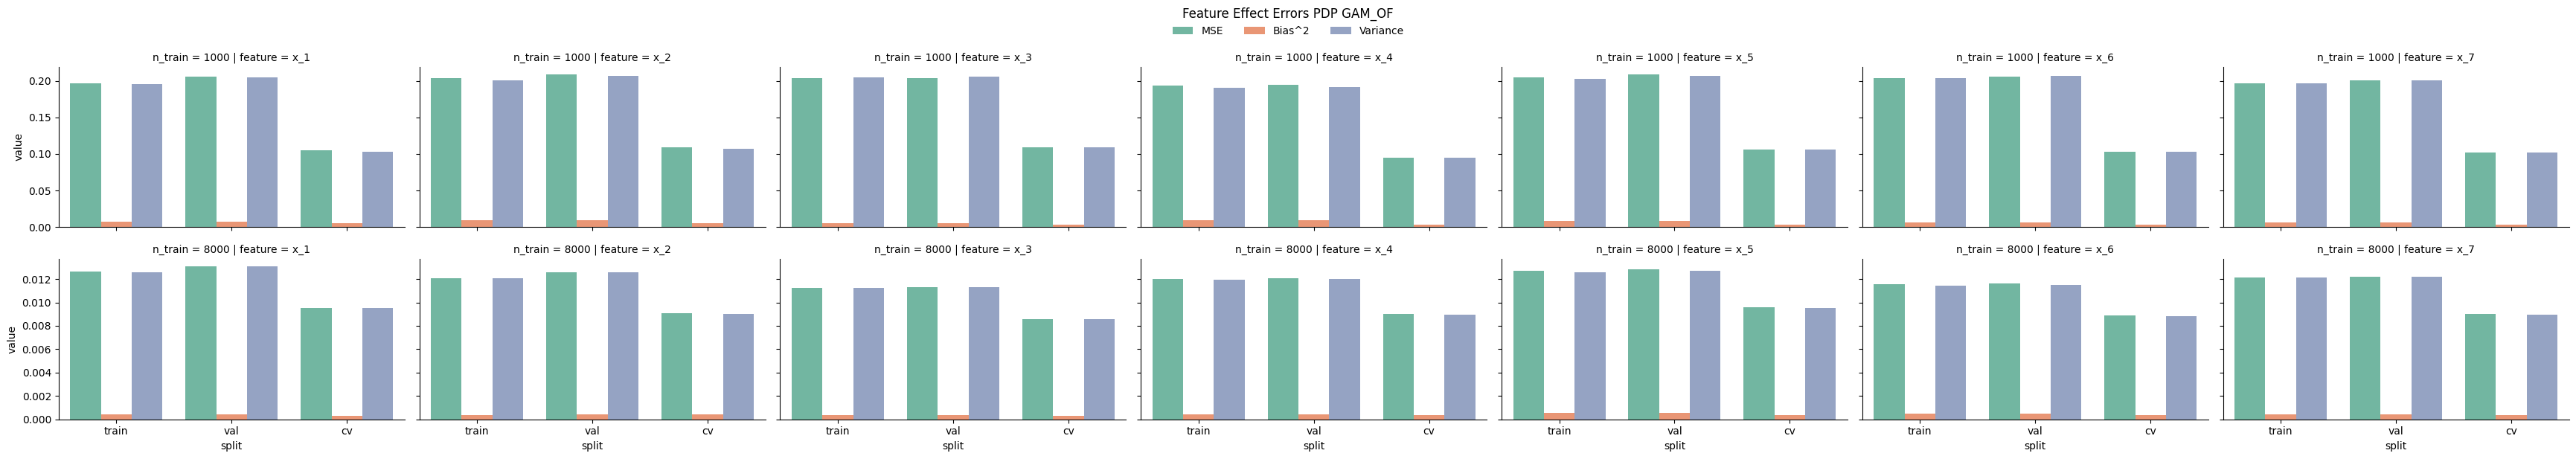

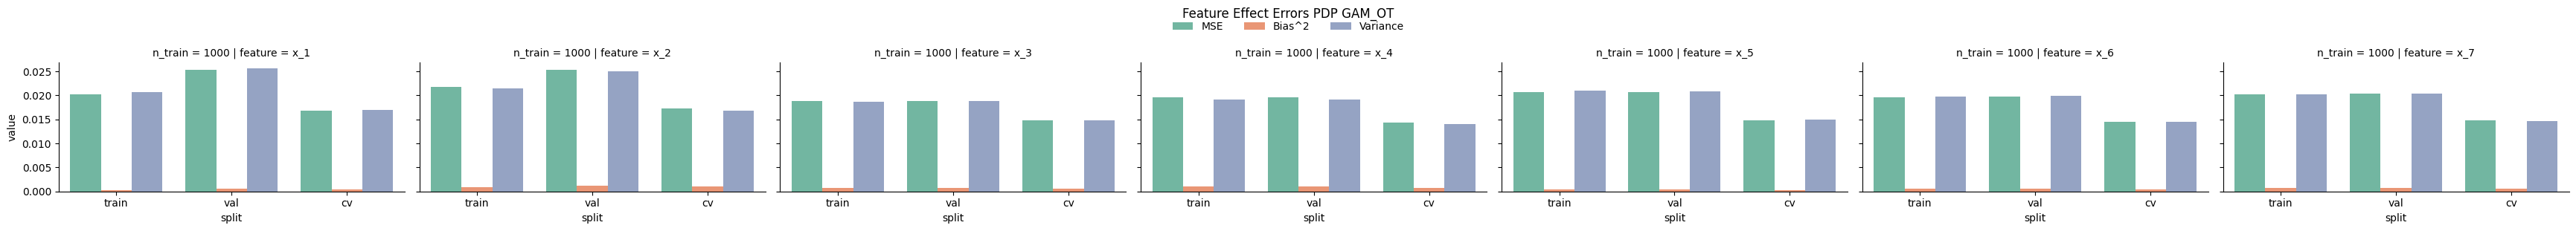

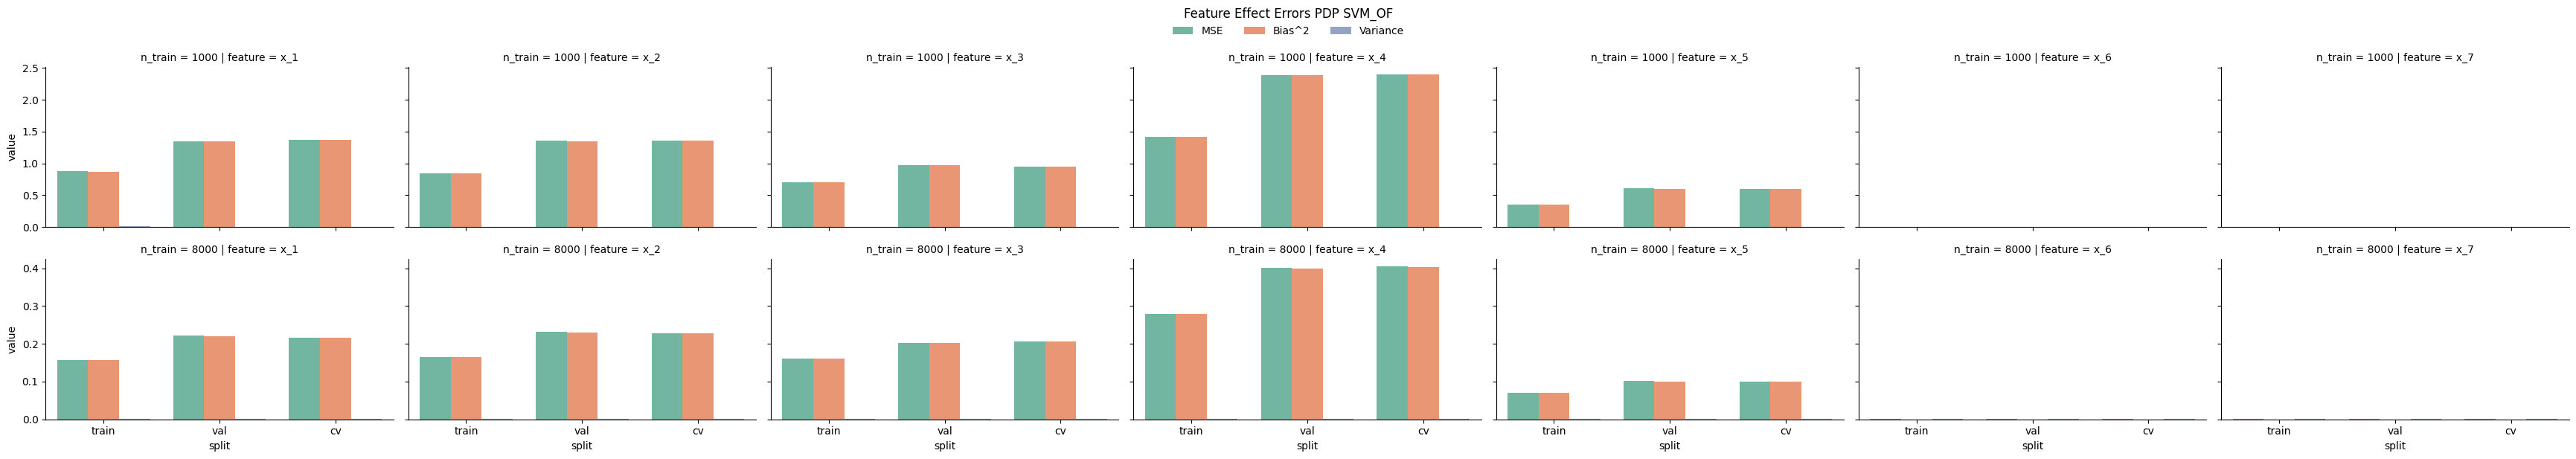

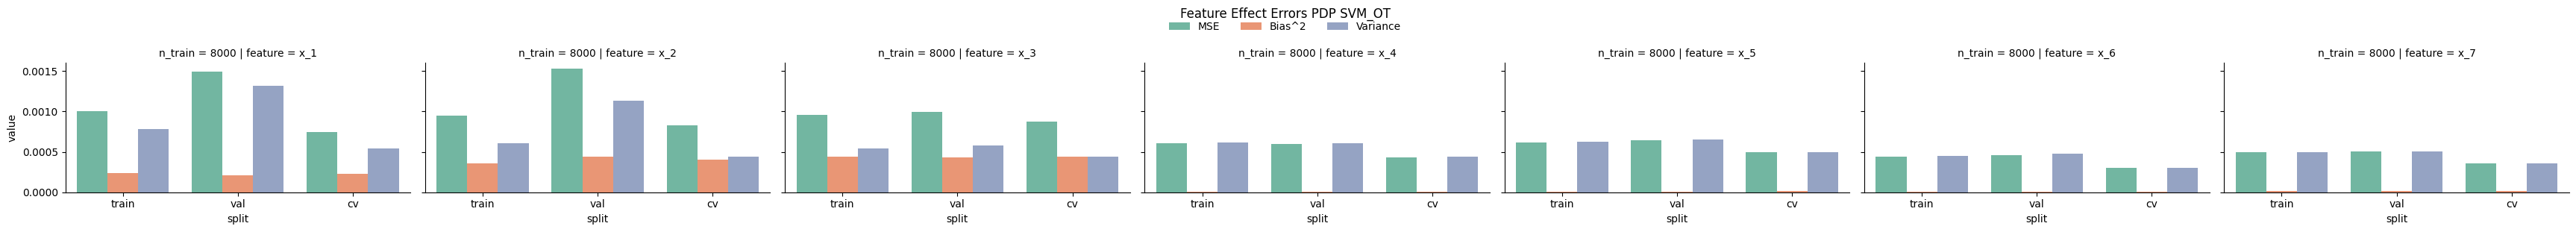

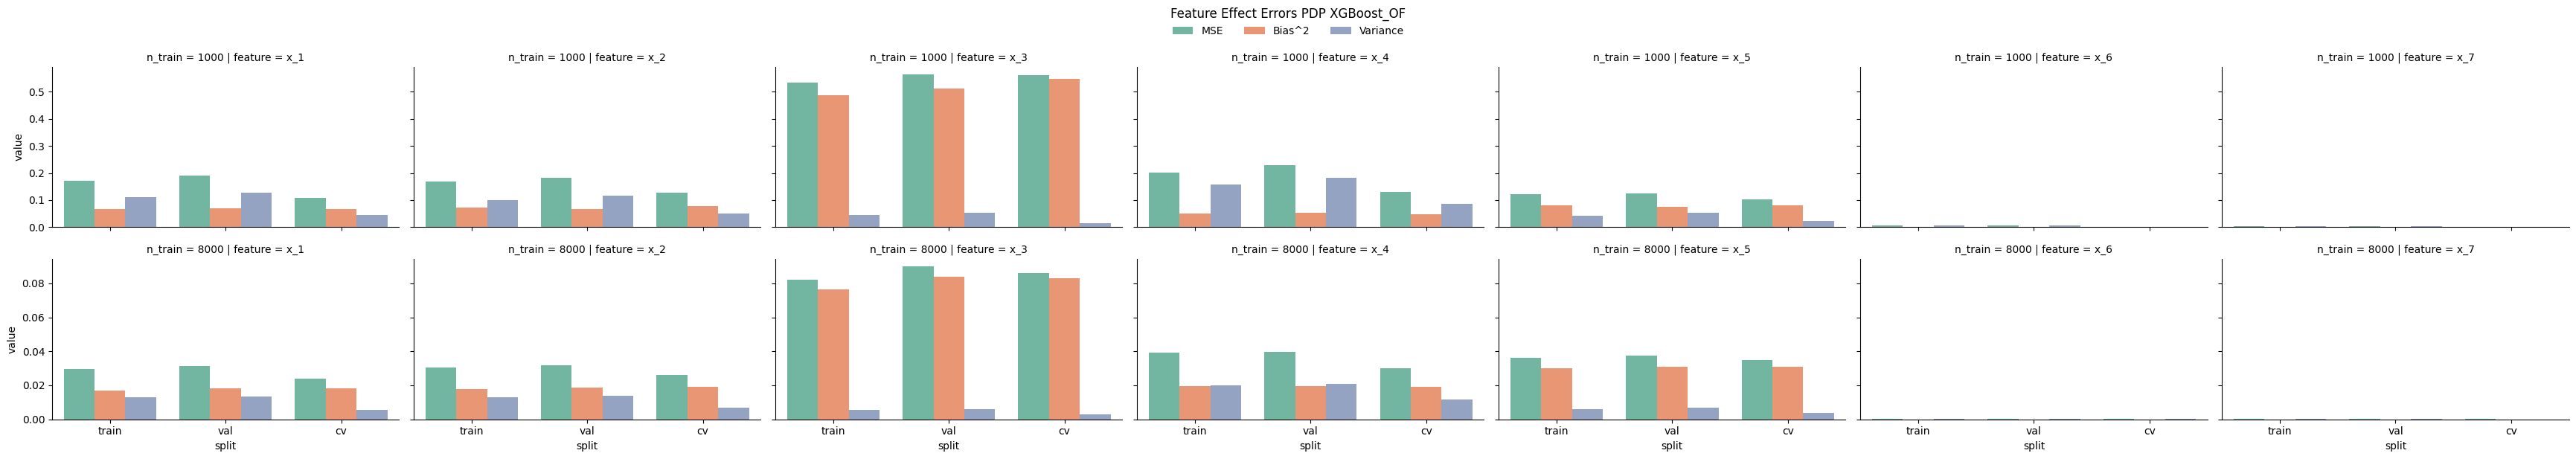

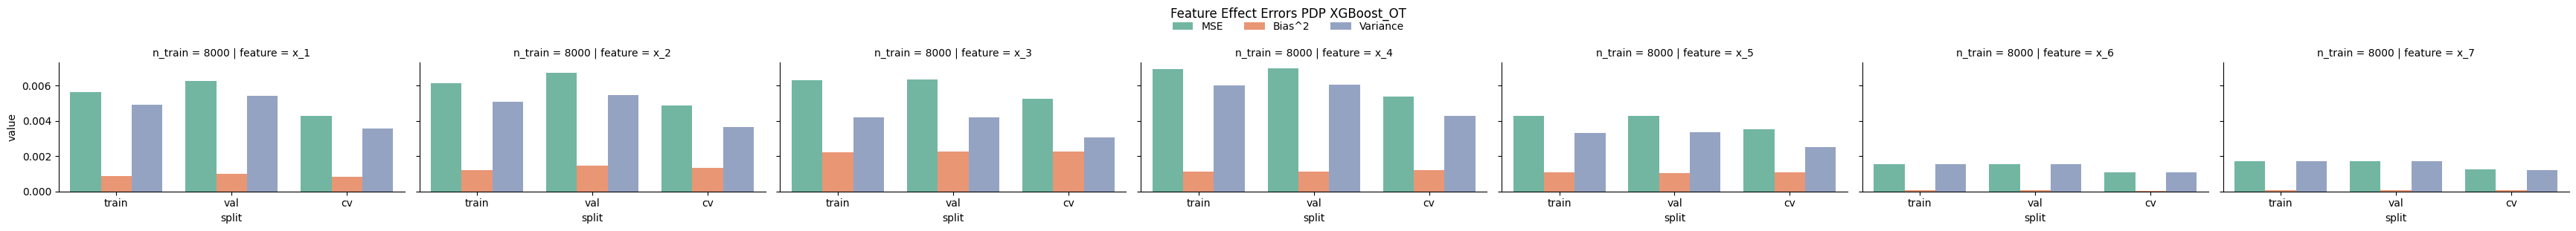

In [11]:
plot_feature_effect_error_table(df_fr1_pdp, models=['LinReg', 'GAM_OF', 'GAM_OT', 'SVM_OF', 'SVM_OT', 'XGBoost_OF', 'XGBoost_OT'], type='pdp')

Observations:
- cv often favorable, variance reduction becomes more obvious
- however sometimes increased  bias - why?

### ALE

In [13]:
df_fr1_ale = pd.read_sql_table("ale_results", f"sqlite:///{EXPERIMENT_PATH}/Friedman1/{effects_results_storage}")
format_dataframe(df_fr1_ale).style.apply(highlight_min_feature_metric, axis=None).format("{:.6f}")

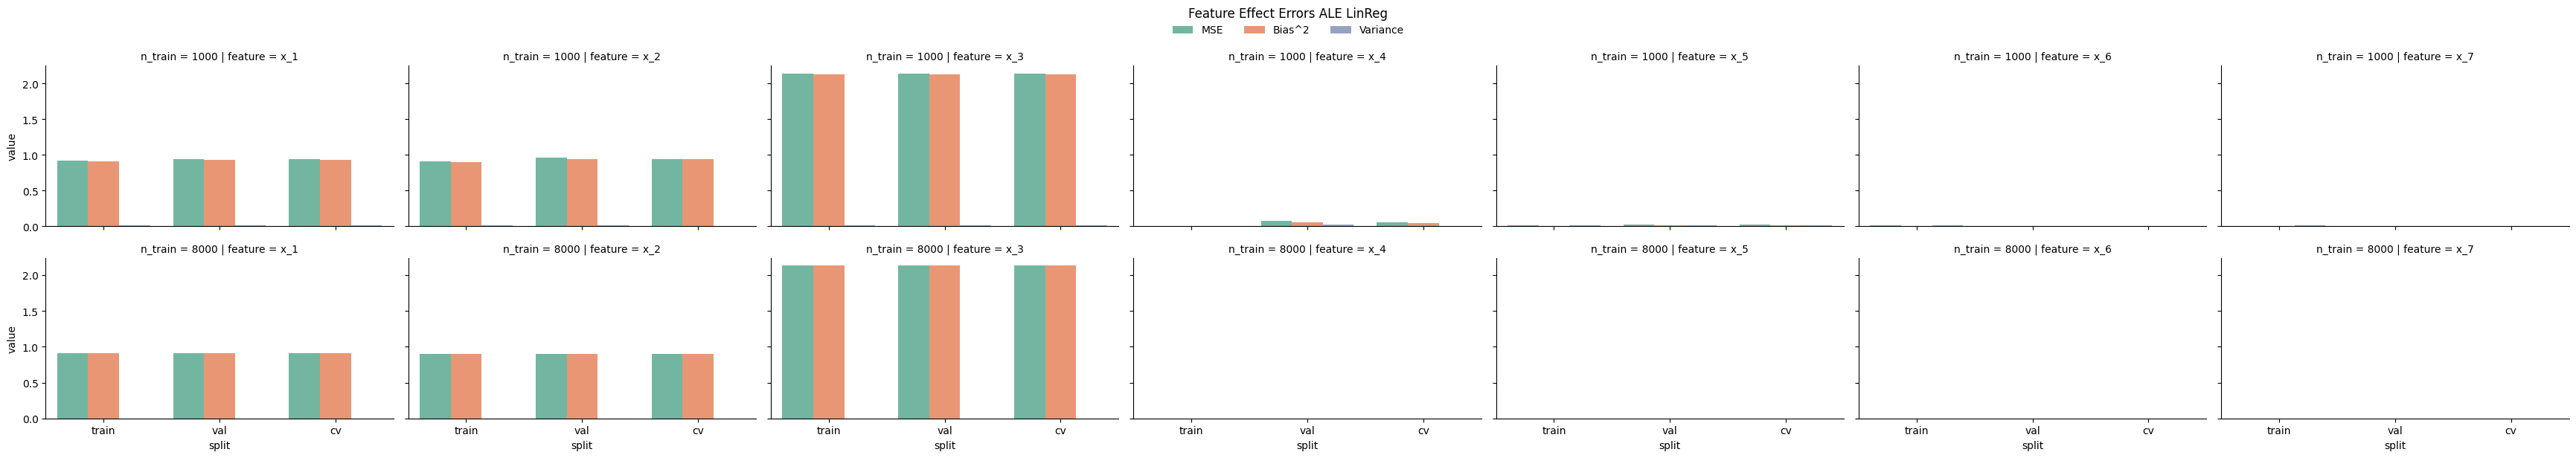

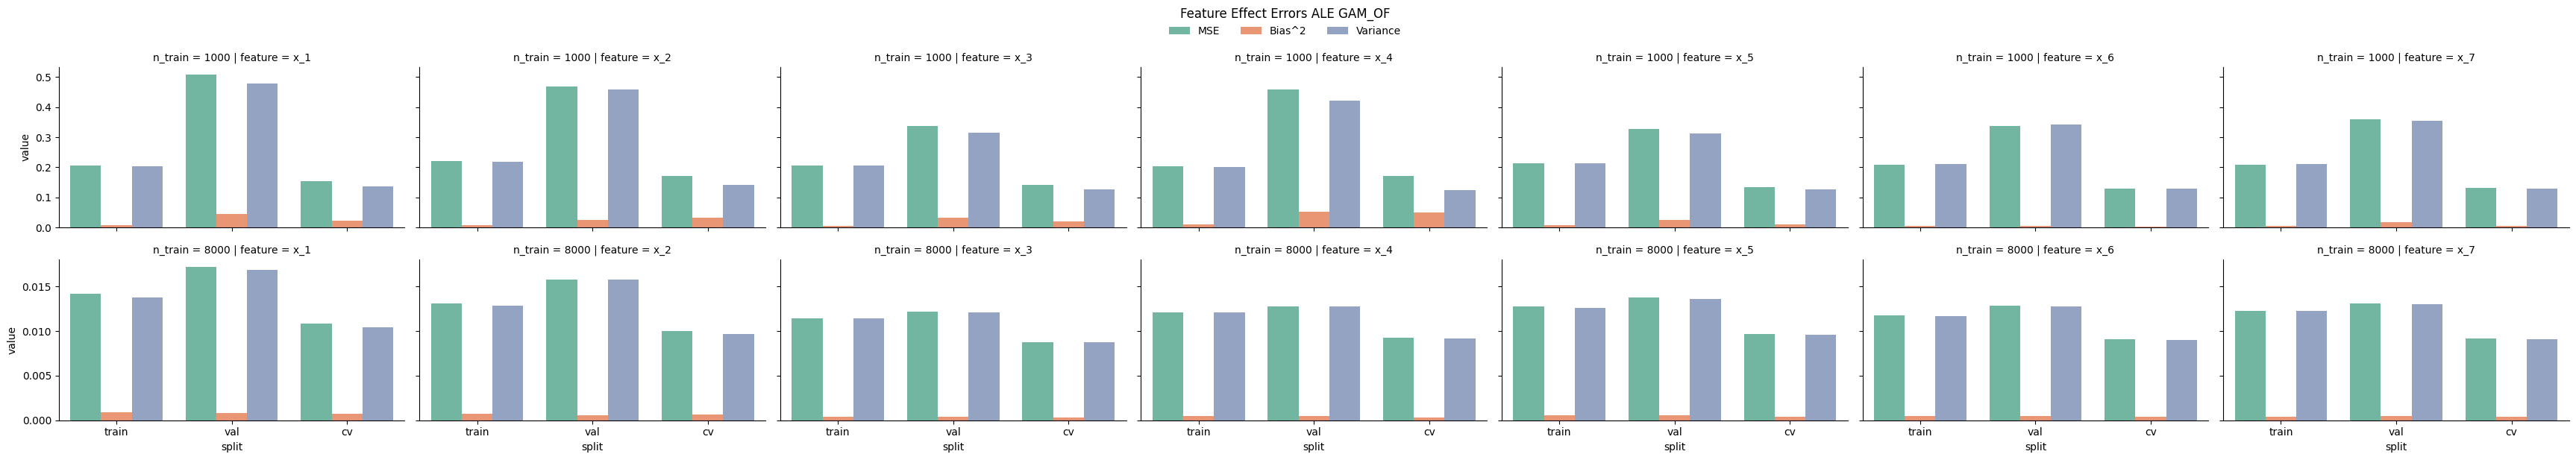

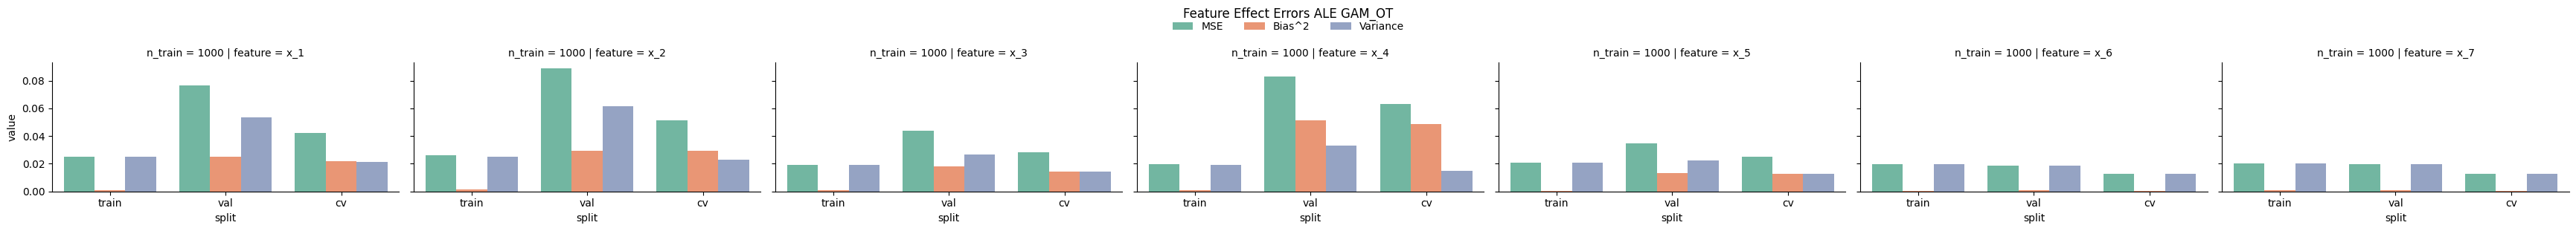

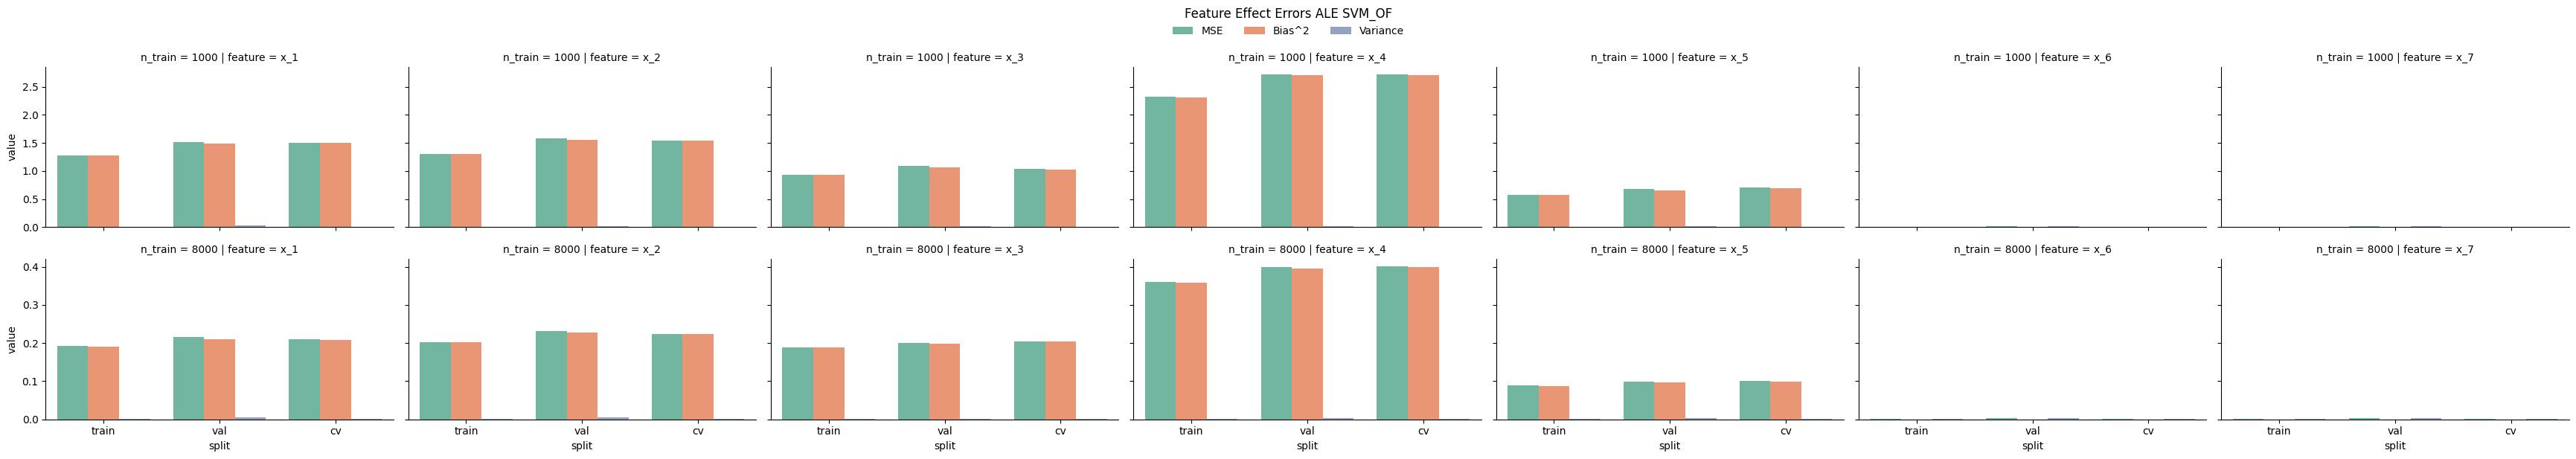

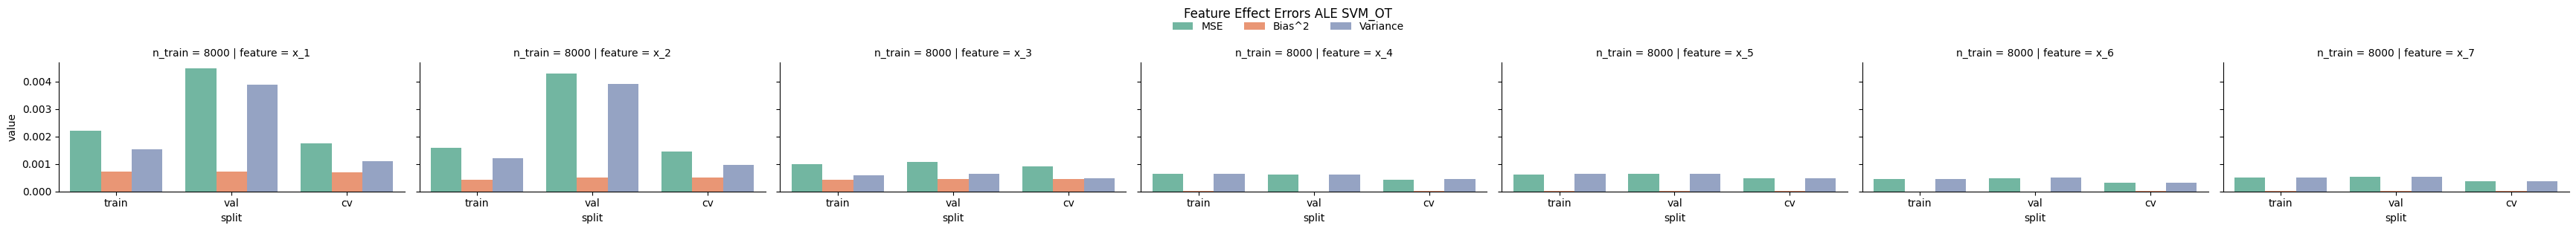

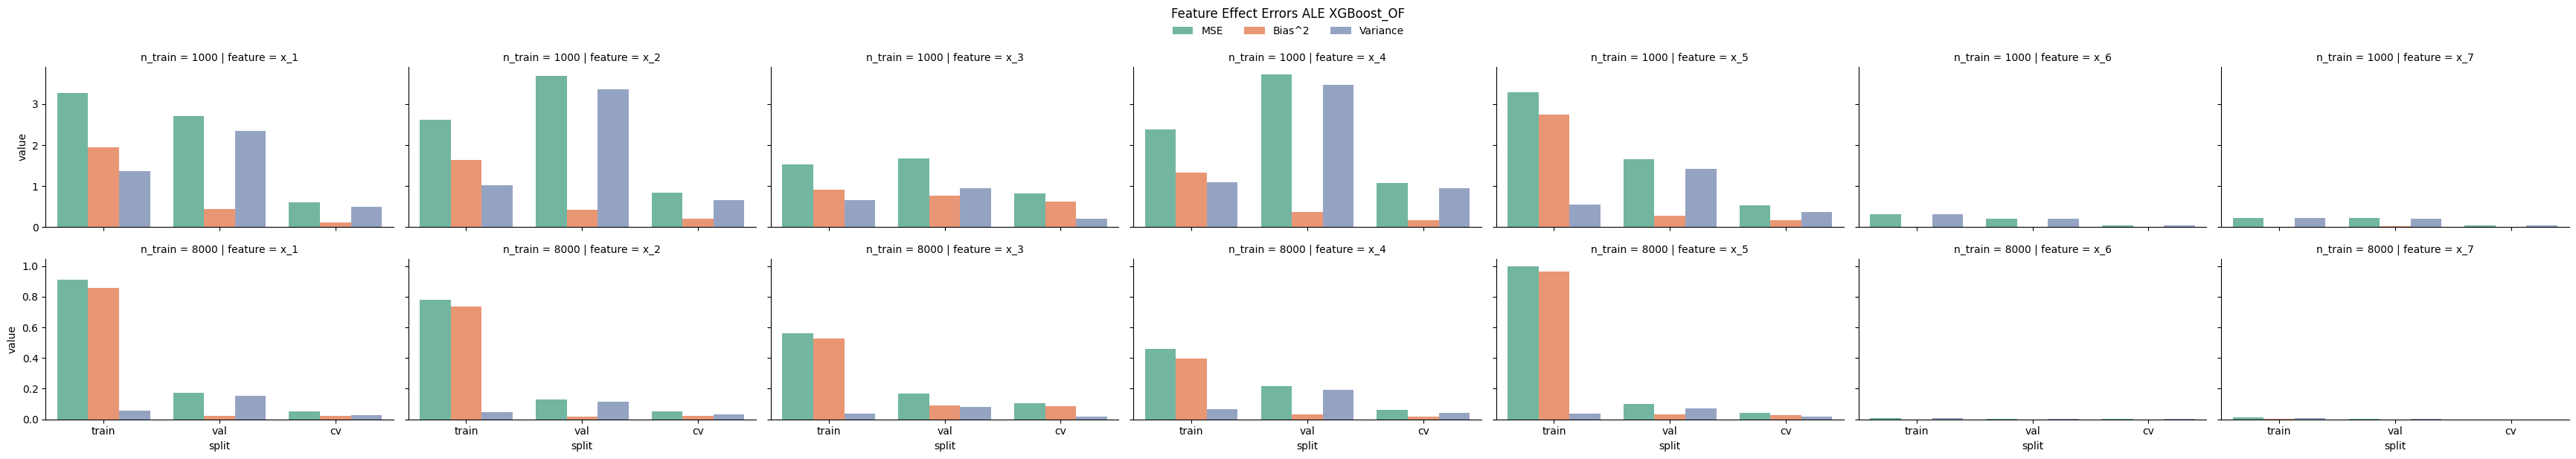

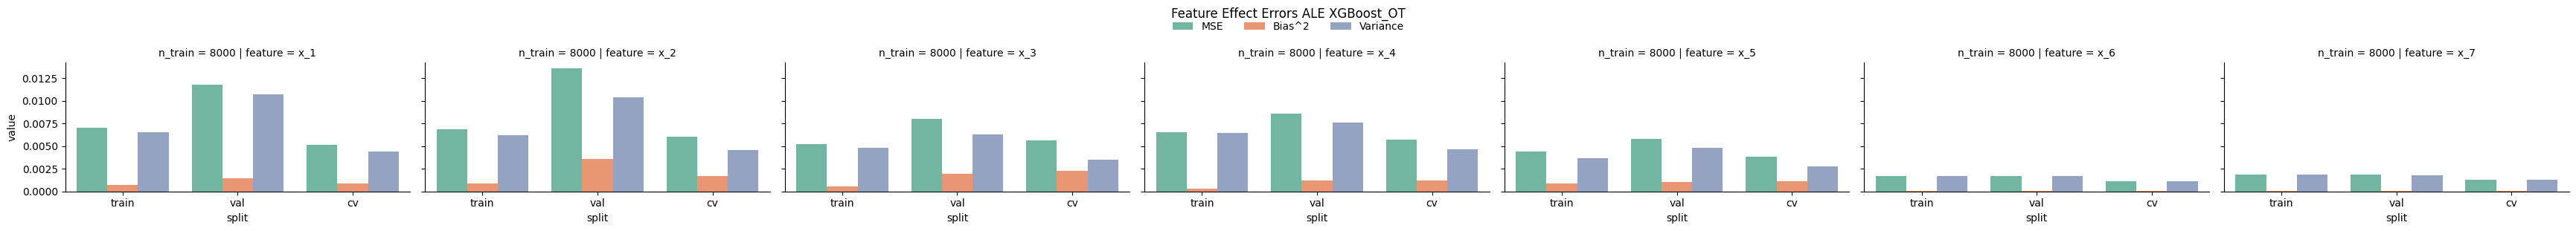

In [14]:
plot_feature_effect_error_table(df_fr1_ale, models=['LinReg', 'GAM_OF', 'GAM_OT', 'SVM_OF', 'SVM_OT', 'XGBoost_OF', 'XGBoost_OT'], type='ale')

Observations:
- similar as for PDP
- surprisingly high bias for GAM_OT with cv - why?
- surpisingly high bias for XGBoost_OF with train set - why?

## FeynmanI.29.16

### PDP

In [15]:
df_fmn_pdp = pd.read_sql_table("pdp_results", f"sqlite:///{EXPERIMENT_PATH}/FeynmanI.29.16/{effects_results_storage}")

In [16]:
df_fmn_pdp_ = format_dataframe(df_fmn_pdp)
df_fmn_pdp_ = df_fmn_pdp_.reindex(columns=pd.MultiIndex.from_product([
    ["x_1", "x_2", "theta_1", "theta_2", "d_1", "d_2"], 
    df_fmn_pdp_.columns.get_level_values(1).unique()
]))
df_fmn_pdp_.style.apply(highlight_min_feature_metric, axis=None).format("{:.6f}")

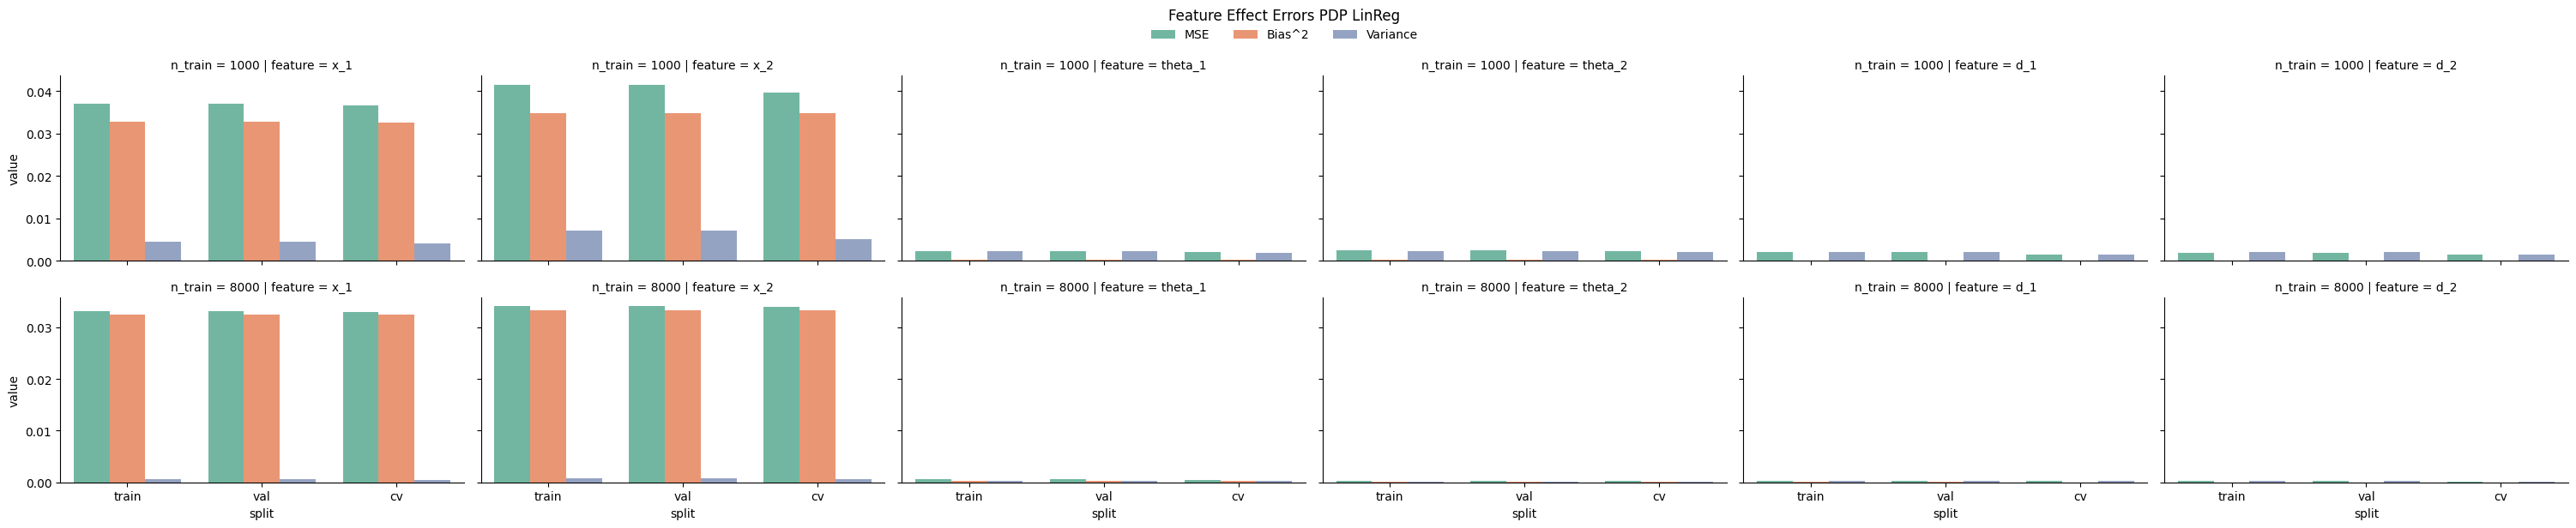

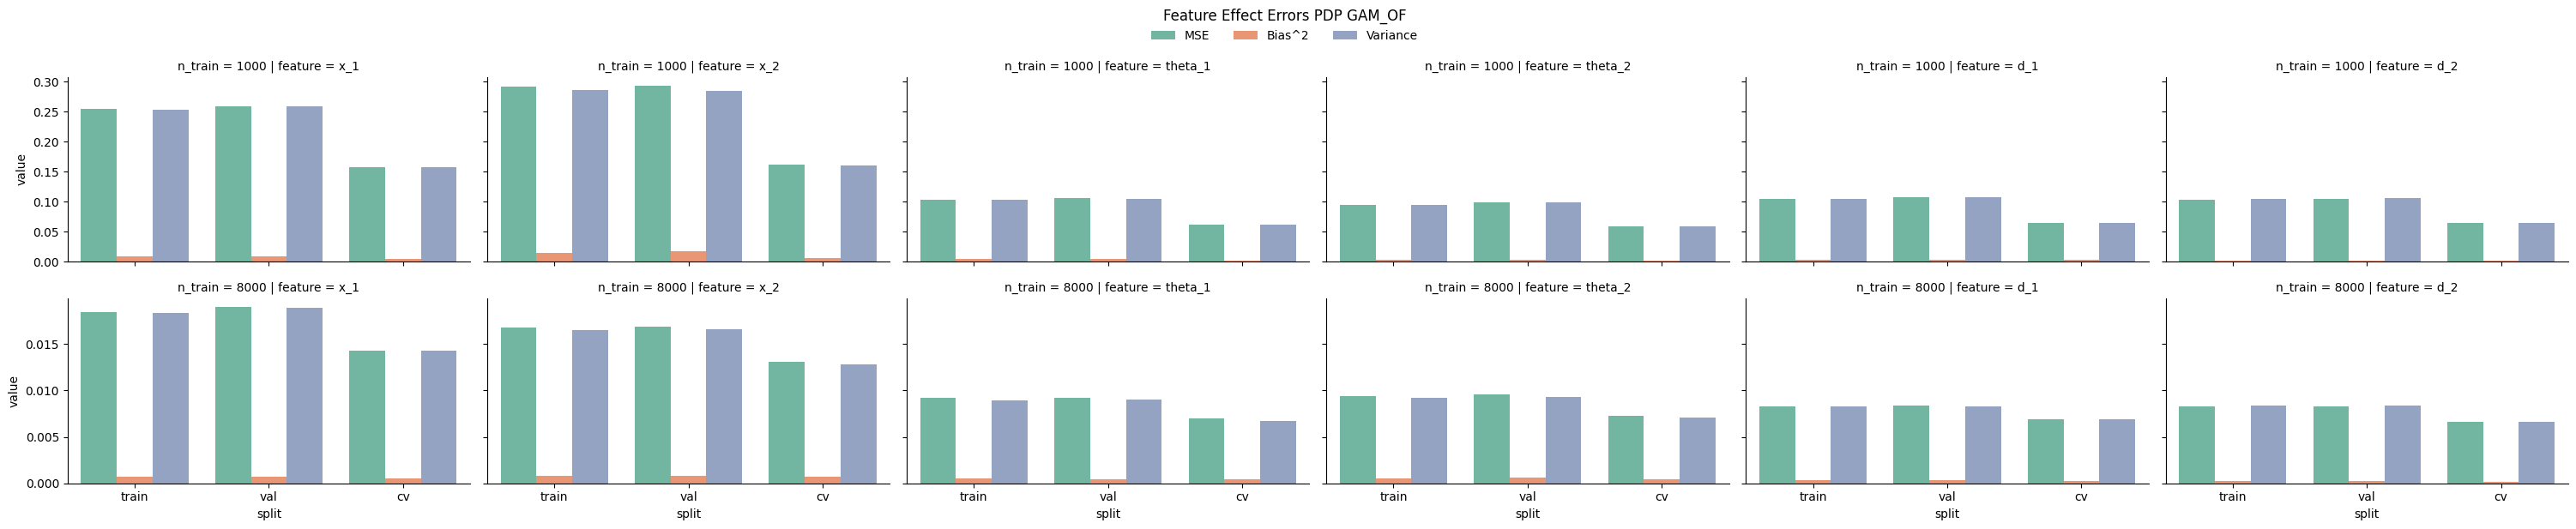

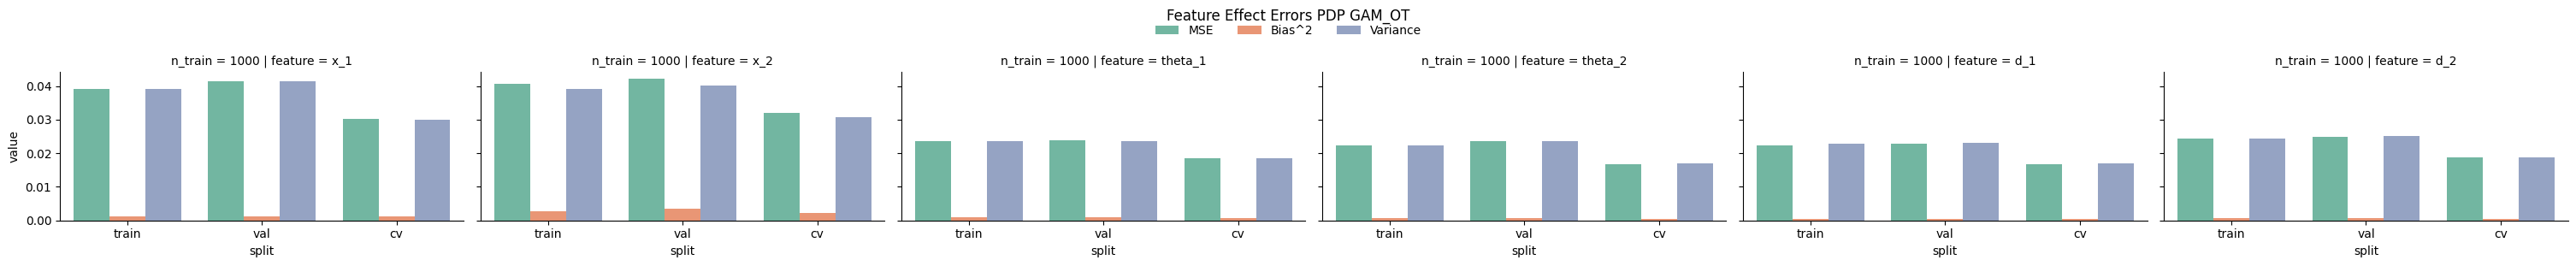

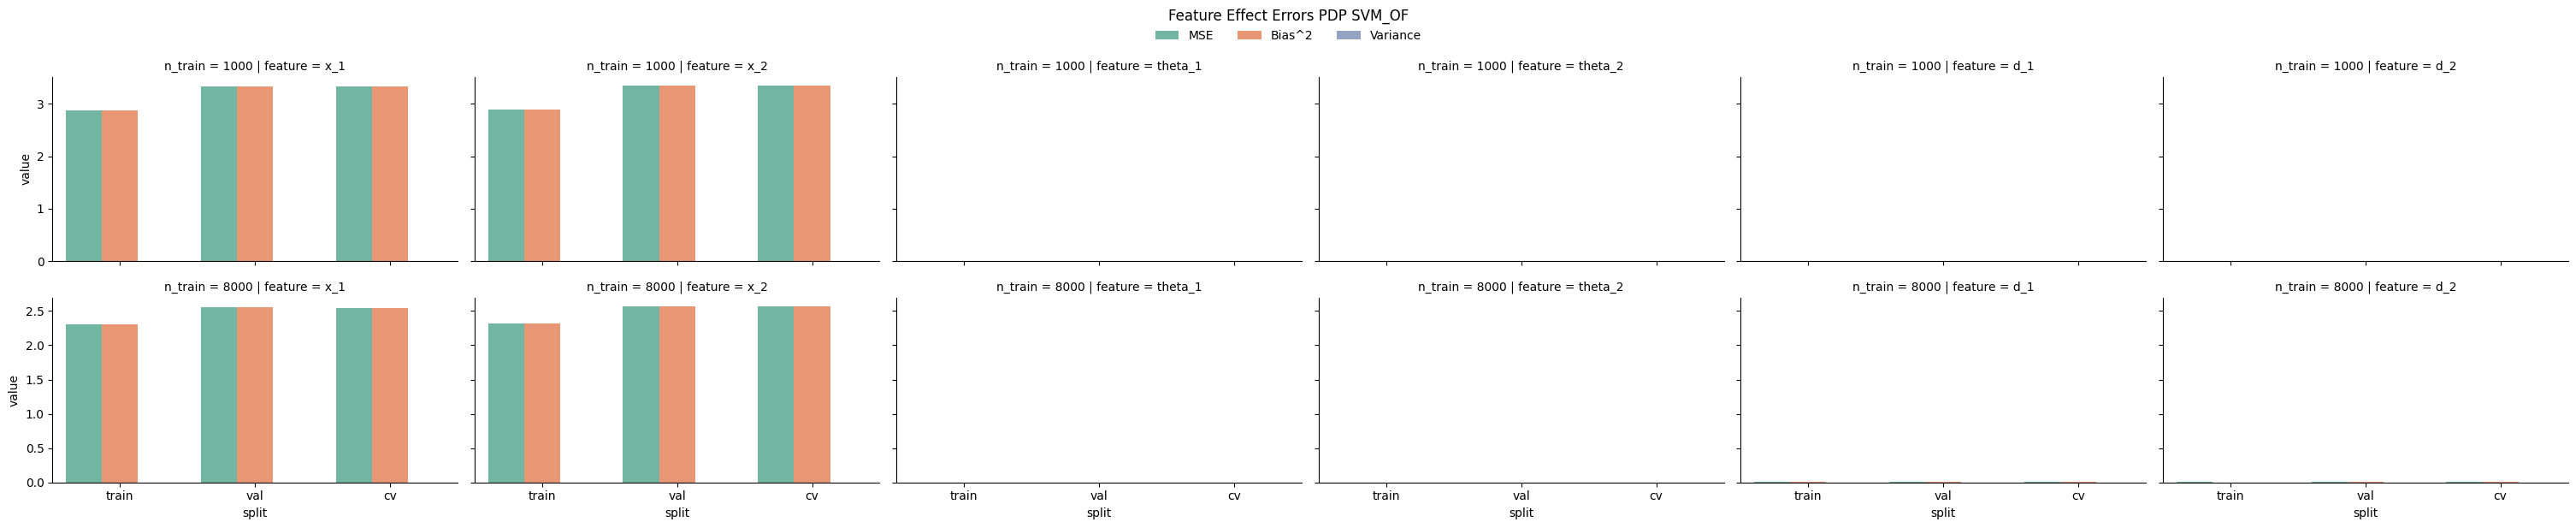

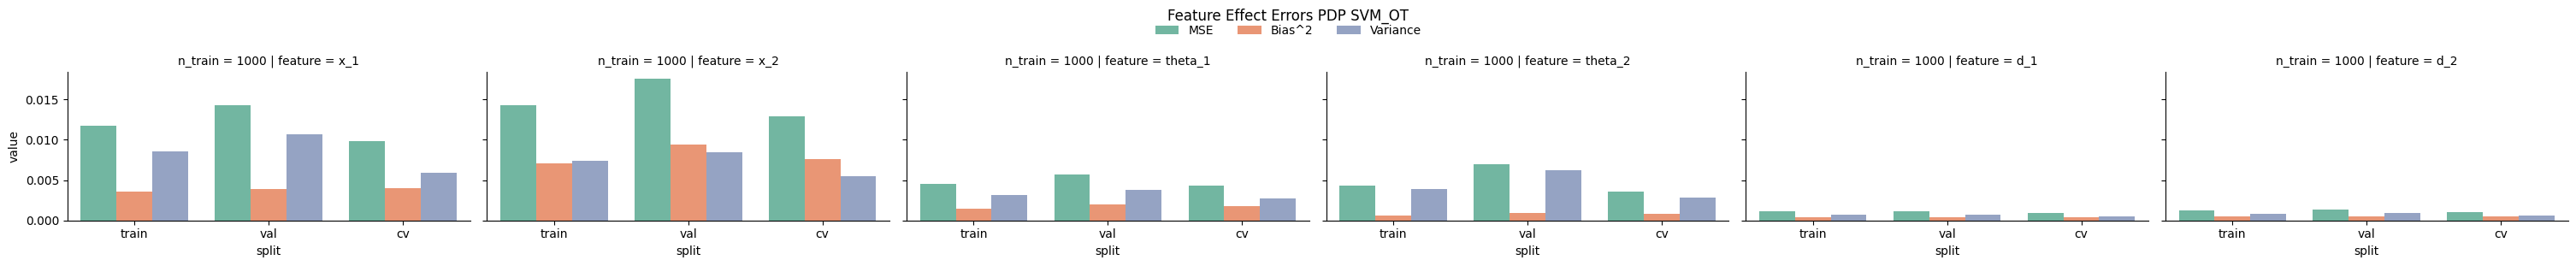

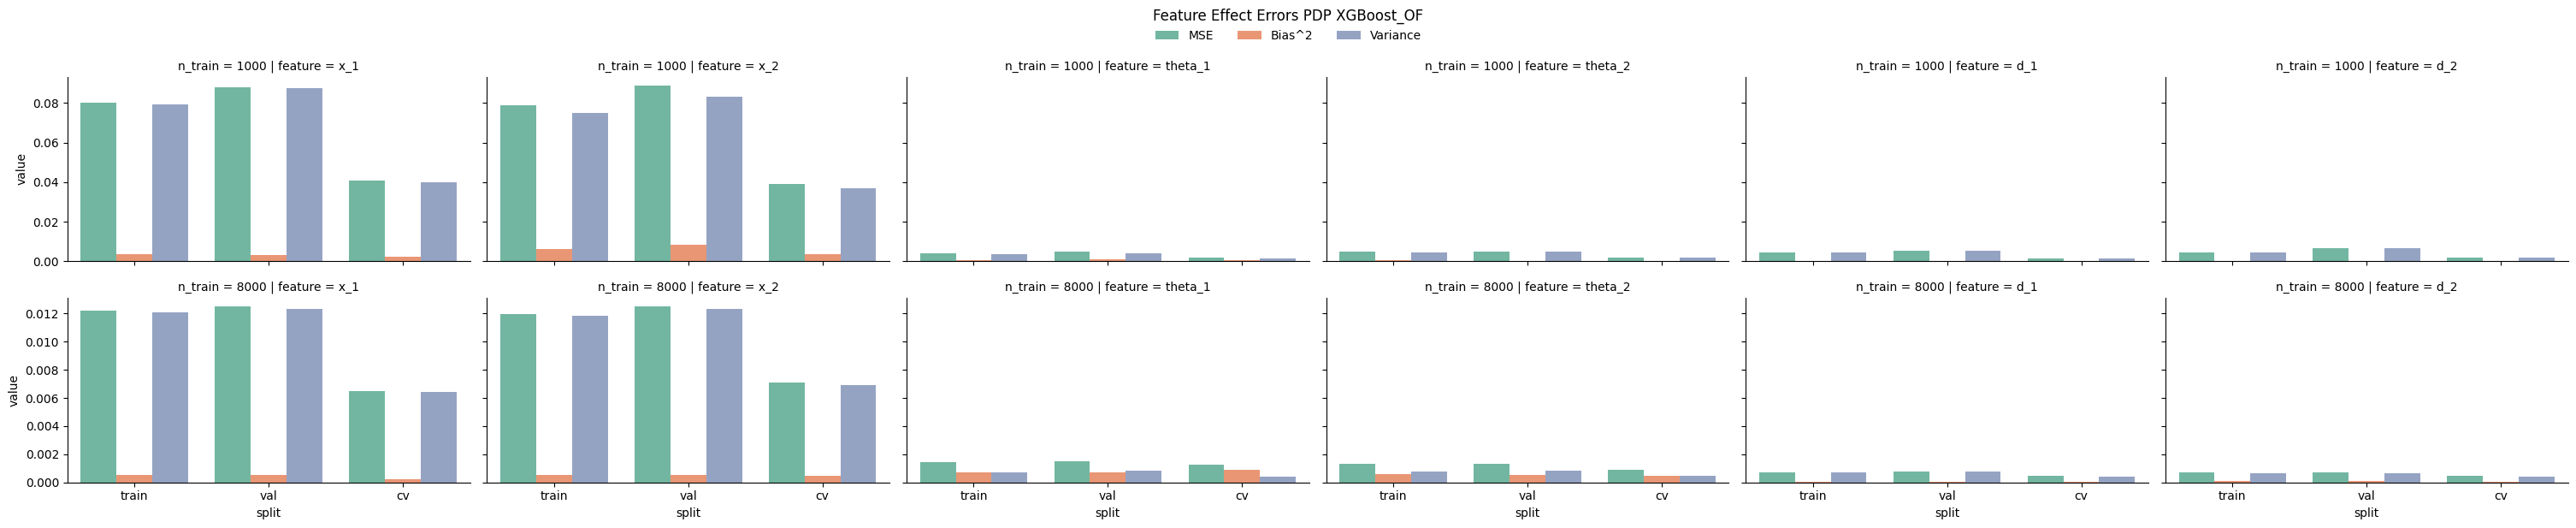

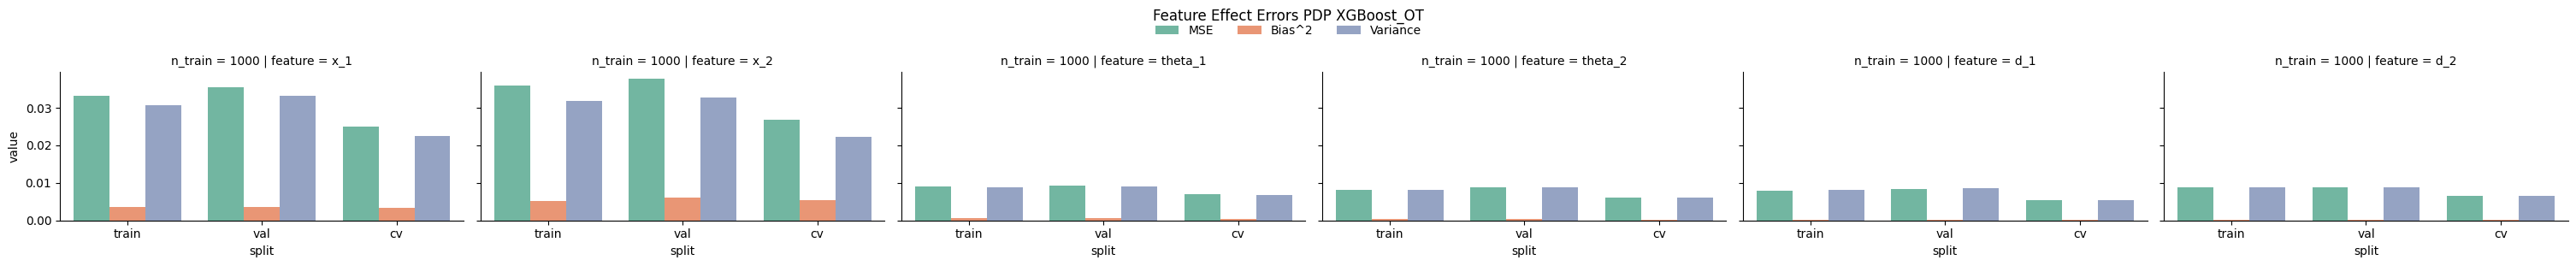

In [18]:
plot_feature_effect_error_table(df_fmn_pdp, models=['LinReg', 'GAM_OF', 'GAM_OT', 'SVM_OF', 'SVM_OT', 'XGBoost_OF', 'XGBoost_OT'], type='pdp')

Observations:
- cv in all cases preferable (except SVM_OF)

### ALE

In [19]:
df_fmn_ale = pd.read_sql_table("ale_results", f"sqlite:///{EXPERIMENT_PATH}/FeynmanI.29.16/{effects_results_storage}")
df_fmn_ale_ = format_dataframe(df_fmn_ale)
df_fmn_ale_ = df_fmn_ale_.reindex(columns=pd.MultiIndex.from_product([
    ["x_1", "x_2", "theta_1", "theta_2", "d_1", "d_2"], 
    df_fmn_ale_.columns.get_level_values(1).unique()
]))
df_fmn_ale_.style.apply(highlight_min_feature_metric, axis=None).format("{:.6f}")

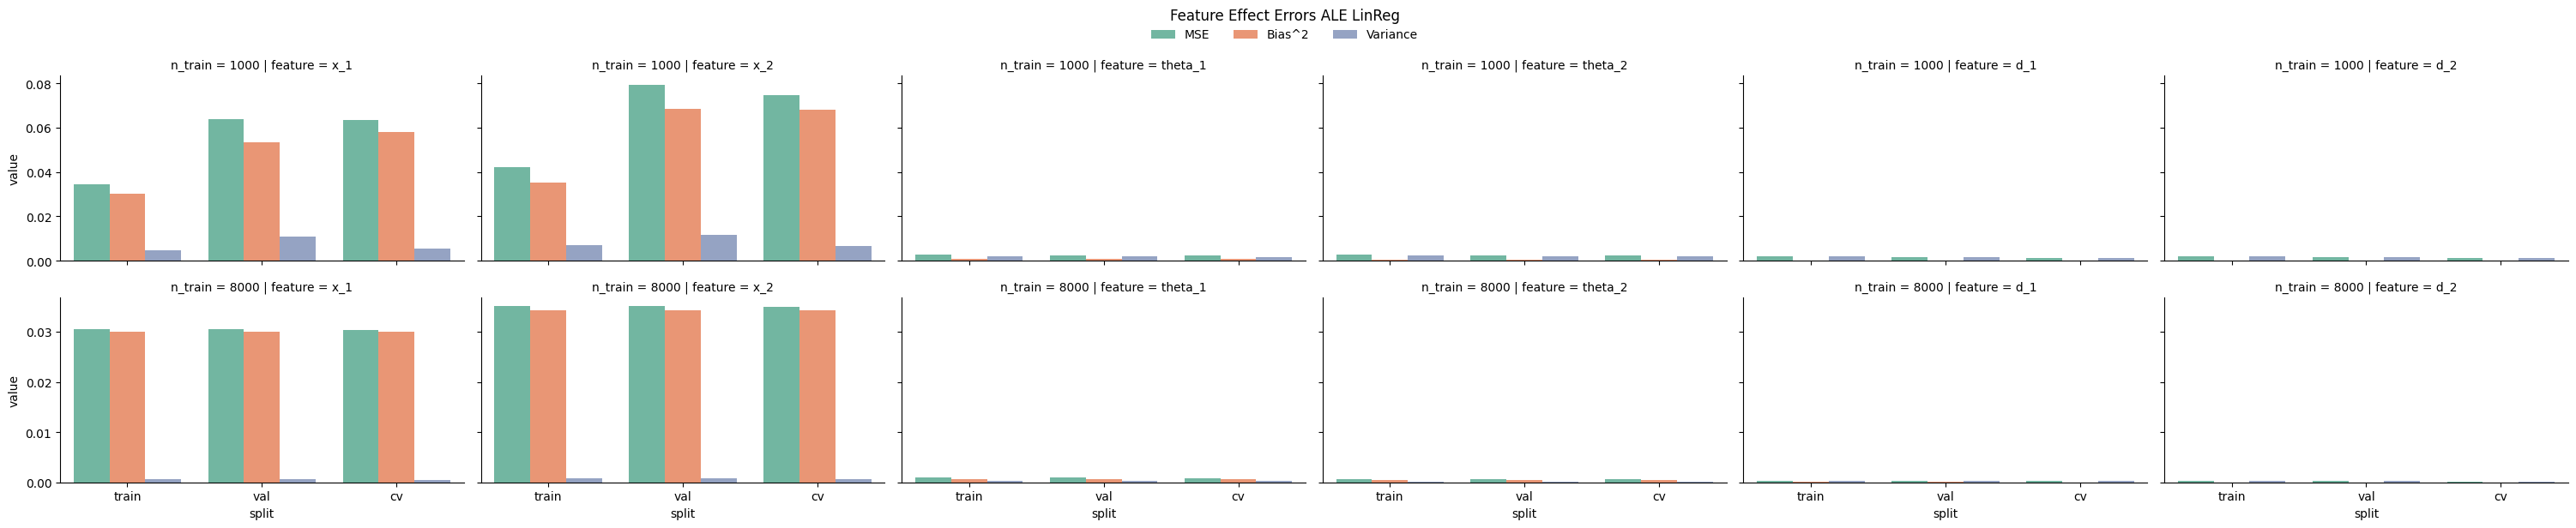

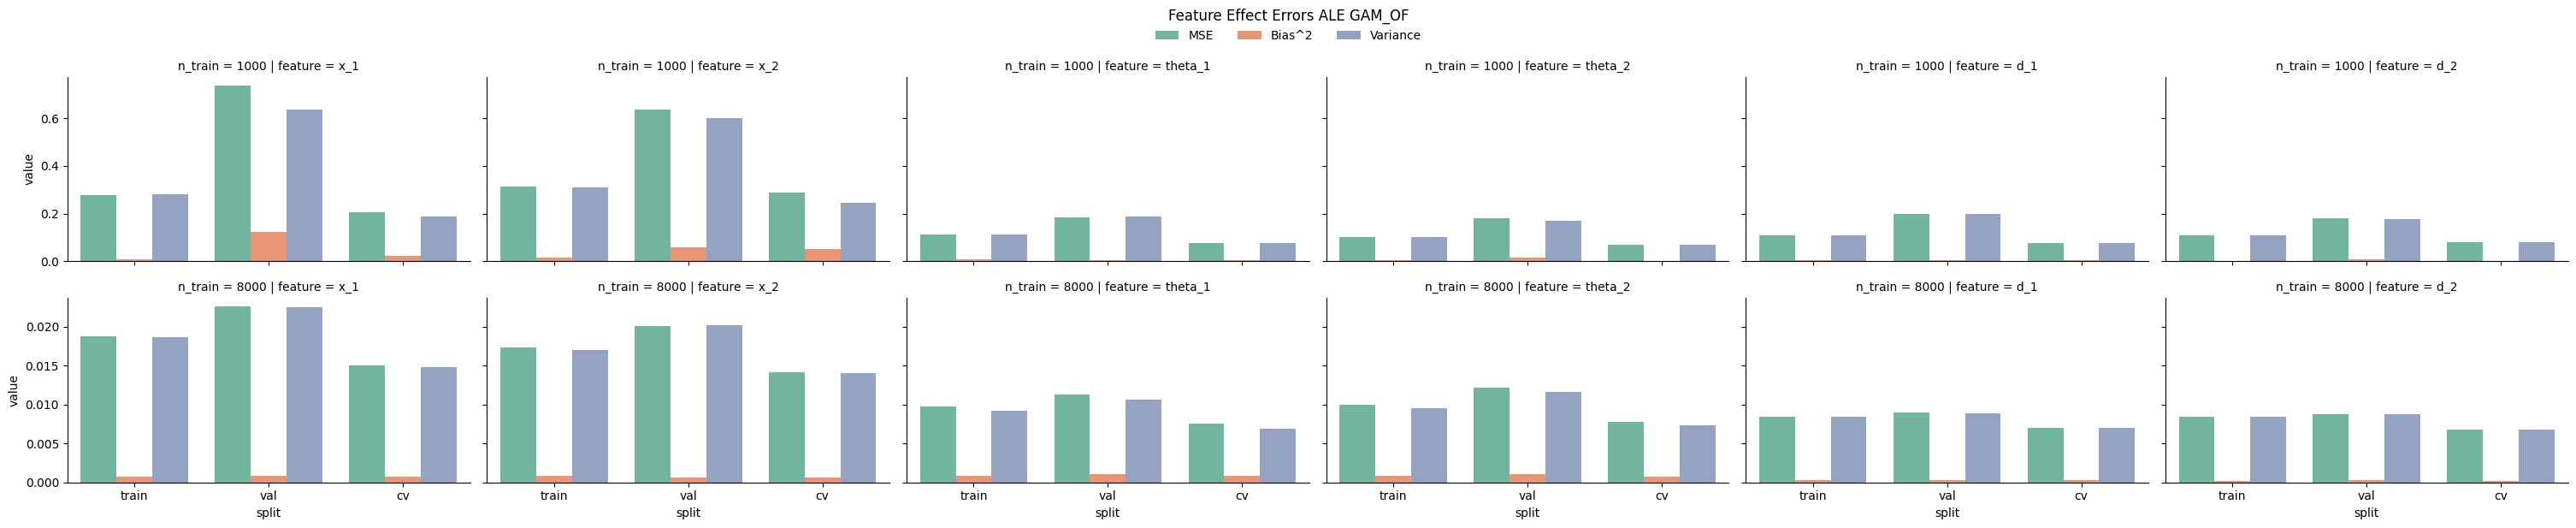

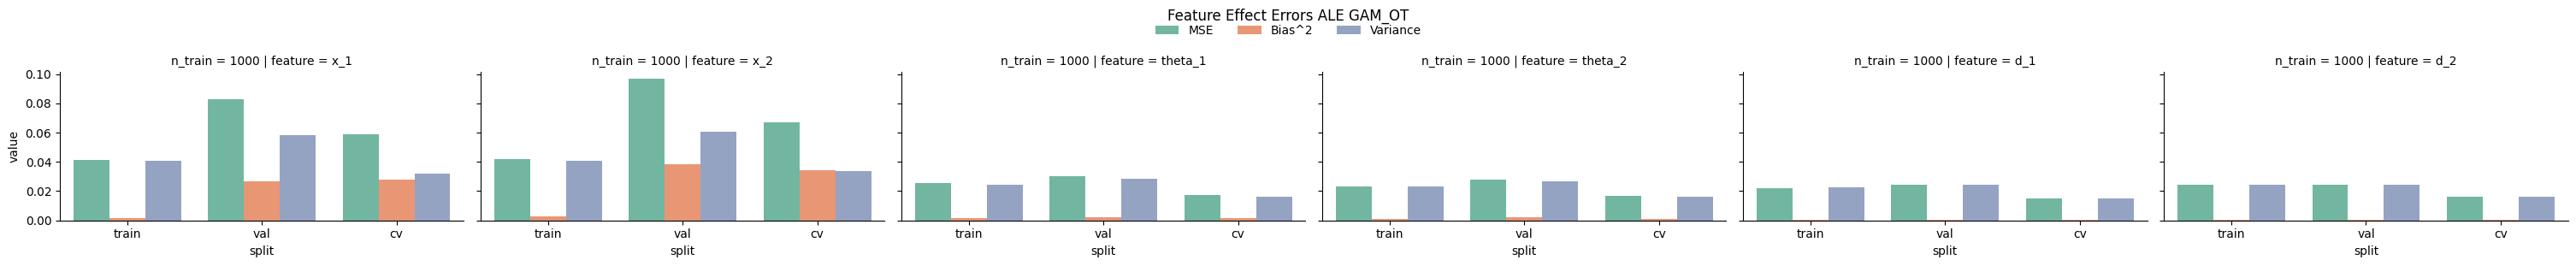

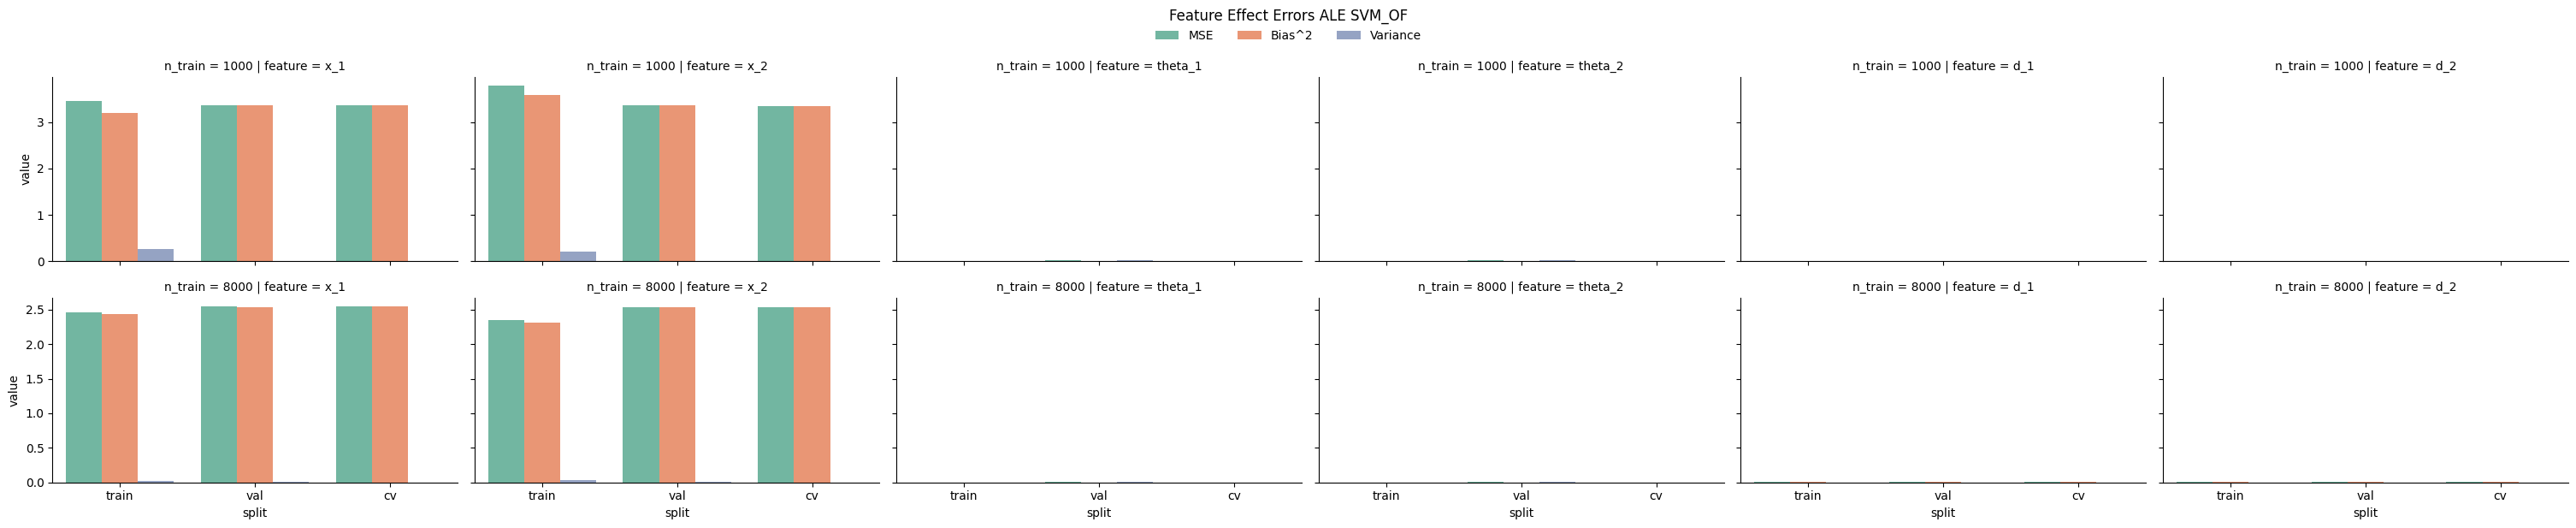

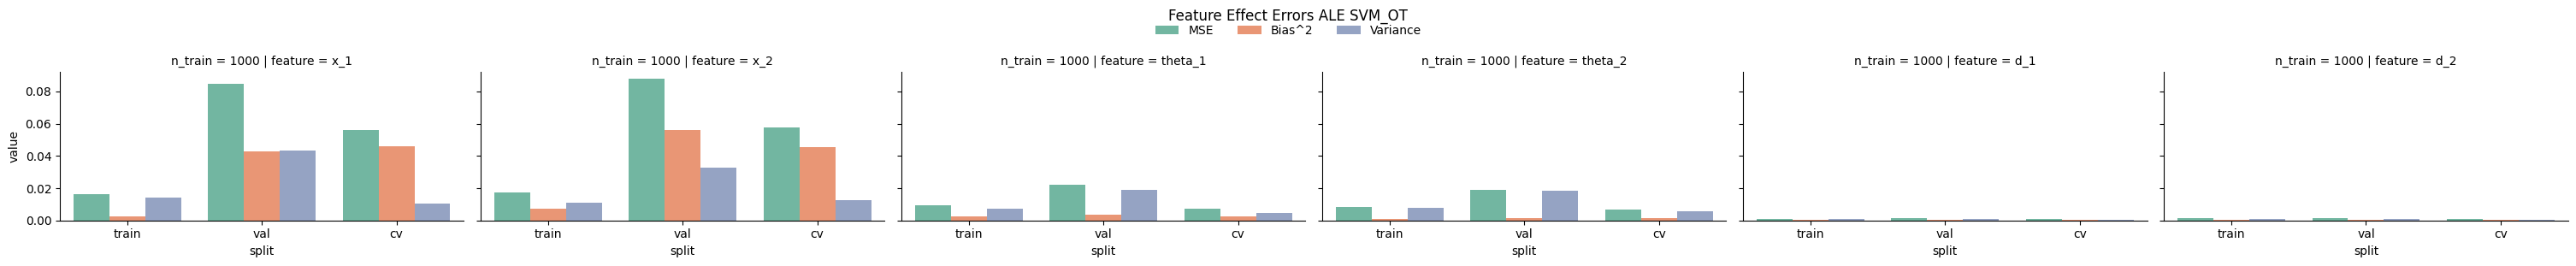

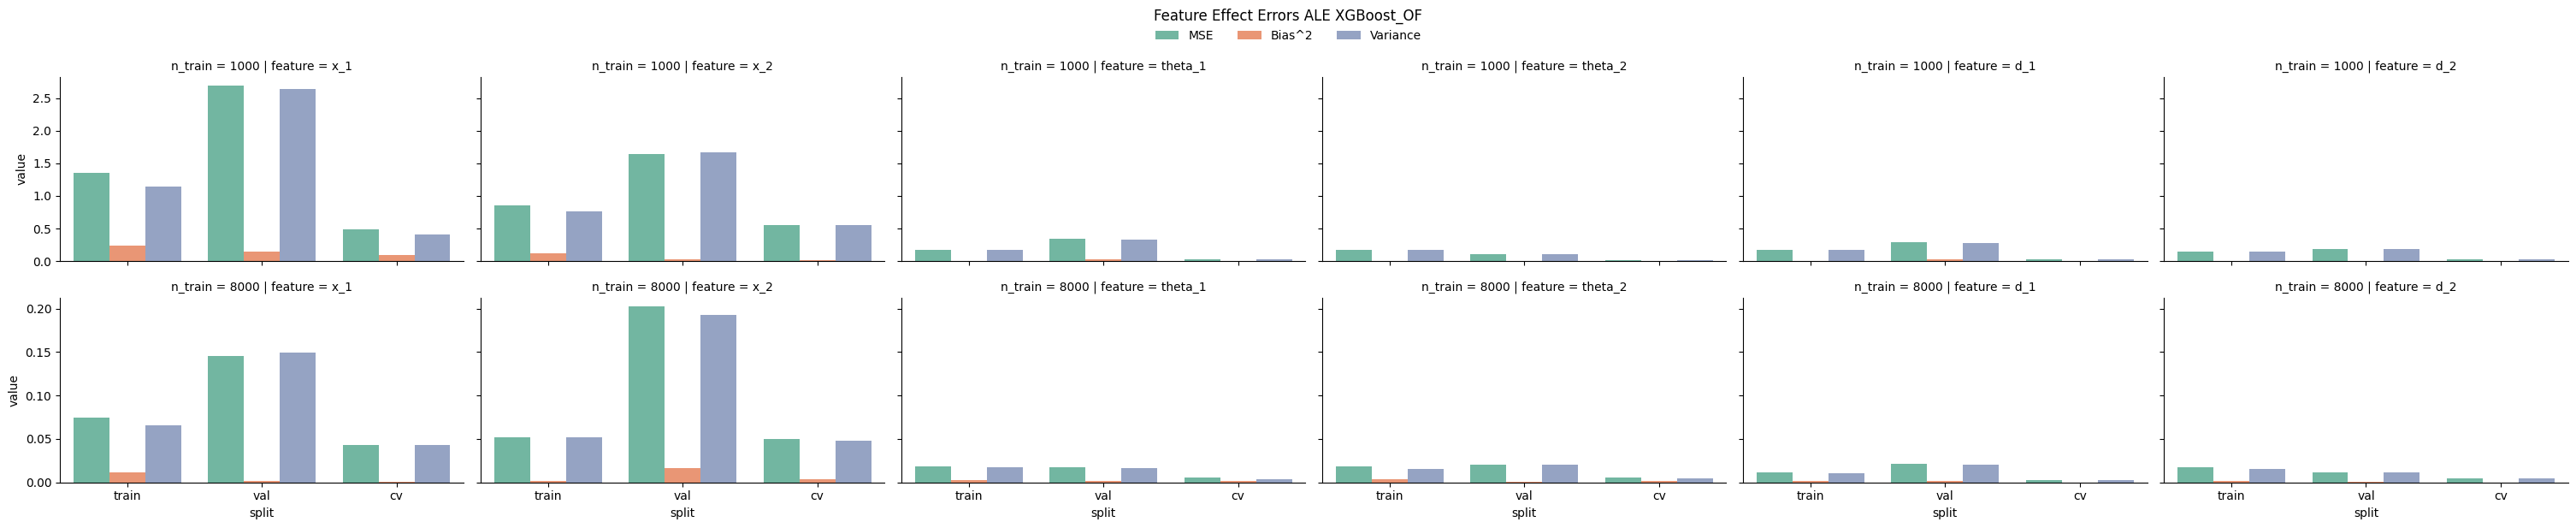

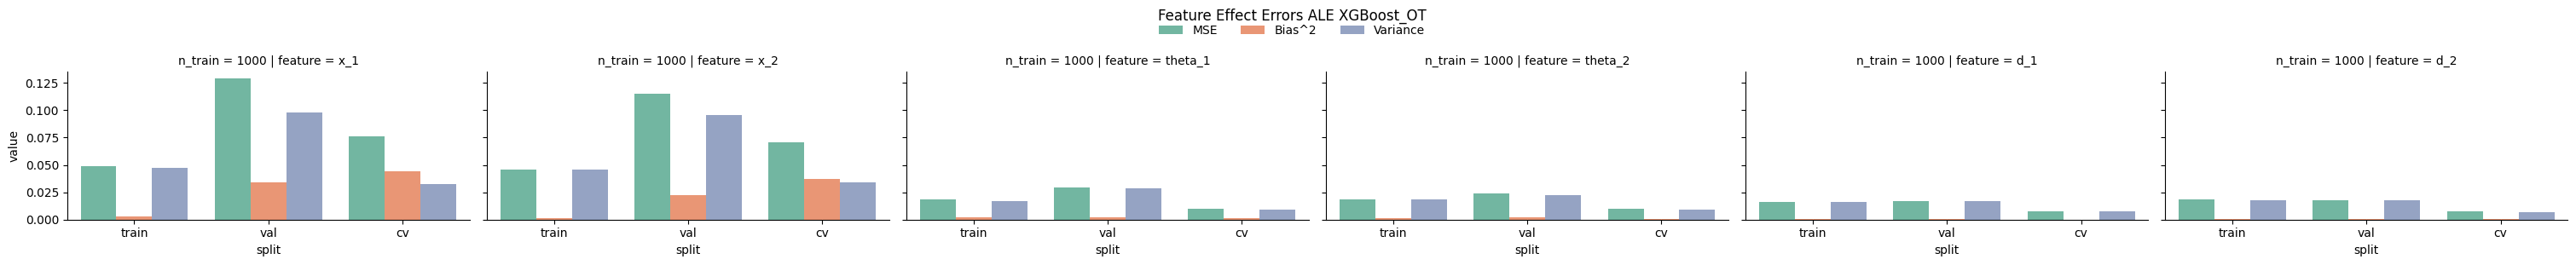

In [20]:
plot_feature_effect_error_table(df_fmn_ale, models=['LinReg', 'GAM_OF', 'GAM_OT', 'SVM_OF', 'SVM_OT', 'XGBoost_OF', 'XGBoost_OT'], type='ale')

Observations:
- cv favorable in most cases with some exceptions where training error is lower (because of lower bias)